In [18]:
import pandas as pd, matplotlib.pyplot as plt
import os, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

In [30]:
data = pd.read_csv("Data/Electrical_Averaged.csv")
data["Timestamp"] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
data

Adam Joseph Lewis Center - Gross Electricity Consumption (kWh)  \
Timestamp                                                                    
2013-01-01                                           4.192083                
2013-01-02                                           5.782357                
2013-01-03                                           5.467969                
2013-01-04                                           4.394909                
2013-01-05                                           4.390560                
...                                                       ...                
2023-01-05                                           3.637969                
2023-01-06                                           5.004740                
2023-01-07                                           5.115781                
2023-01-08                                           4.921263                
2023-01-09                                           5.054430                

            Kohl Building - Total Electricity Use (kWh)  \
Timestamp                                                 
2013-01-01                                          NaN   
2013-01-02                                          NaN   
2013-01-03                                          NaN   
2013-01-04                                          NaN   
2013-01-05                                          NaN   
...                                                 ...   
2023-01-05                                          NaN   
2023-01-06                                          NaN   
2023-01-07                                          NaN   
2023-01-08                                          NaN   
2023-01-09                                          NaN   

            Science Center - Electricity Use (kWh)  \
Timestamp                                            
2013-01-01                                     NaN   
2013-01-02                                     NaN   
2013-01-03                                     NaN   
2013-01-04                                     NaN   
2013-01-05                                     NaN   
...                                            ...   
2023-01-05                               91.208333   
2023-01-06                               92.312500   
2023-01-07                               82.791667   
2023-01-08                               83.937500   
2023-01-09                               90.529412   

            Asia House - Residential Electricity Use (kWh)  \
Timestamp                                                    
2013-01-01                                        0.692230   
2013-01-02                                        1.029615   
2013-01-03                                        1.374802   
2013-01-04                                        1.287357   
2013-01-05                                        1.528151   
...                                                    ...   
2023-01-05                                        1.787786   
2023-01-06                                        1.831198   
2023-01-07                                        1.894258   
2023-01-08                                        1.907109   
2023-01-09                                        1.820276   

            East - Electricity Use (kWh)  Kahn - Total Electricity Use (kWh)  \
Timestamp                                                                      
2013-01-01                      5.139488                                 NaN   
2013-01-02                      5.830312                                 NaN   
2013-01-03                      6.049635                                 NaN   
2013-01-04                      6.200052                                 NaN   
2013-01-05                      6.384844                                 NaN   
...                                  ...                                 ...   
2023-01-05                      5.433385                           10.093490   

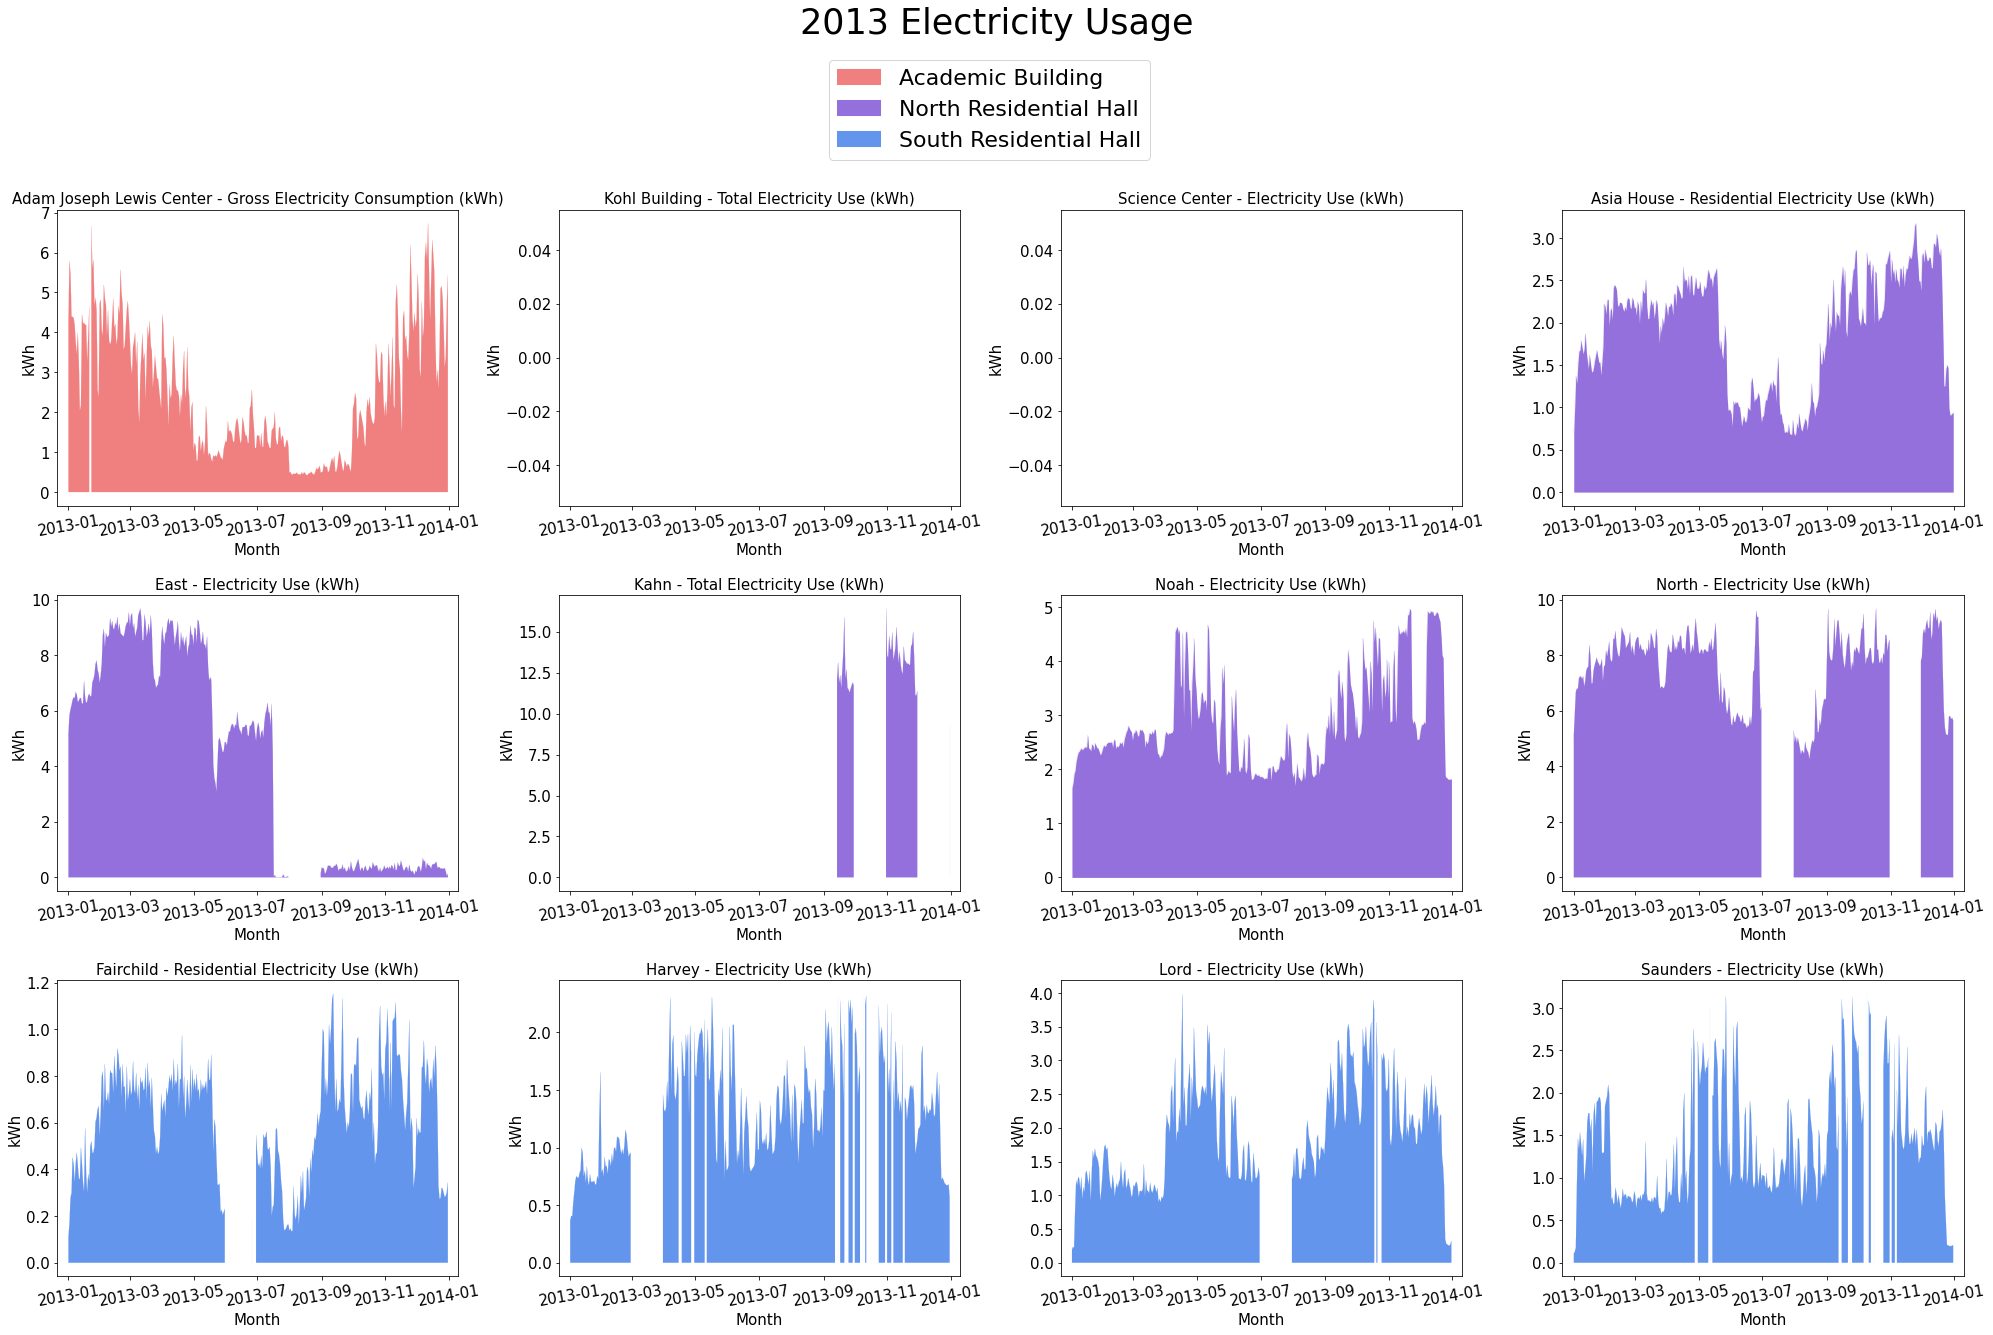

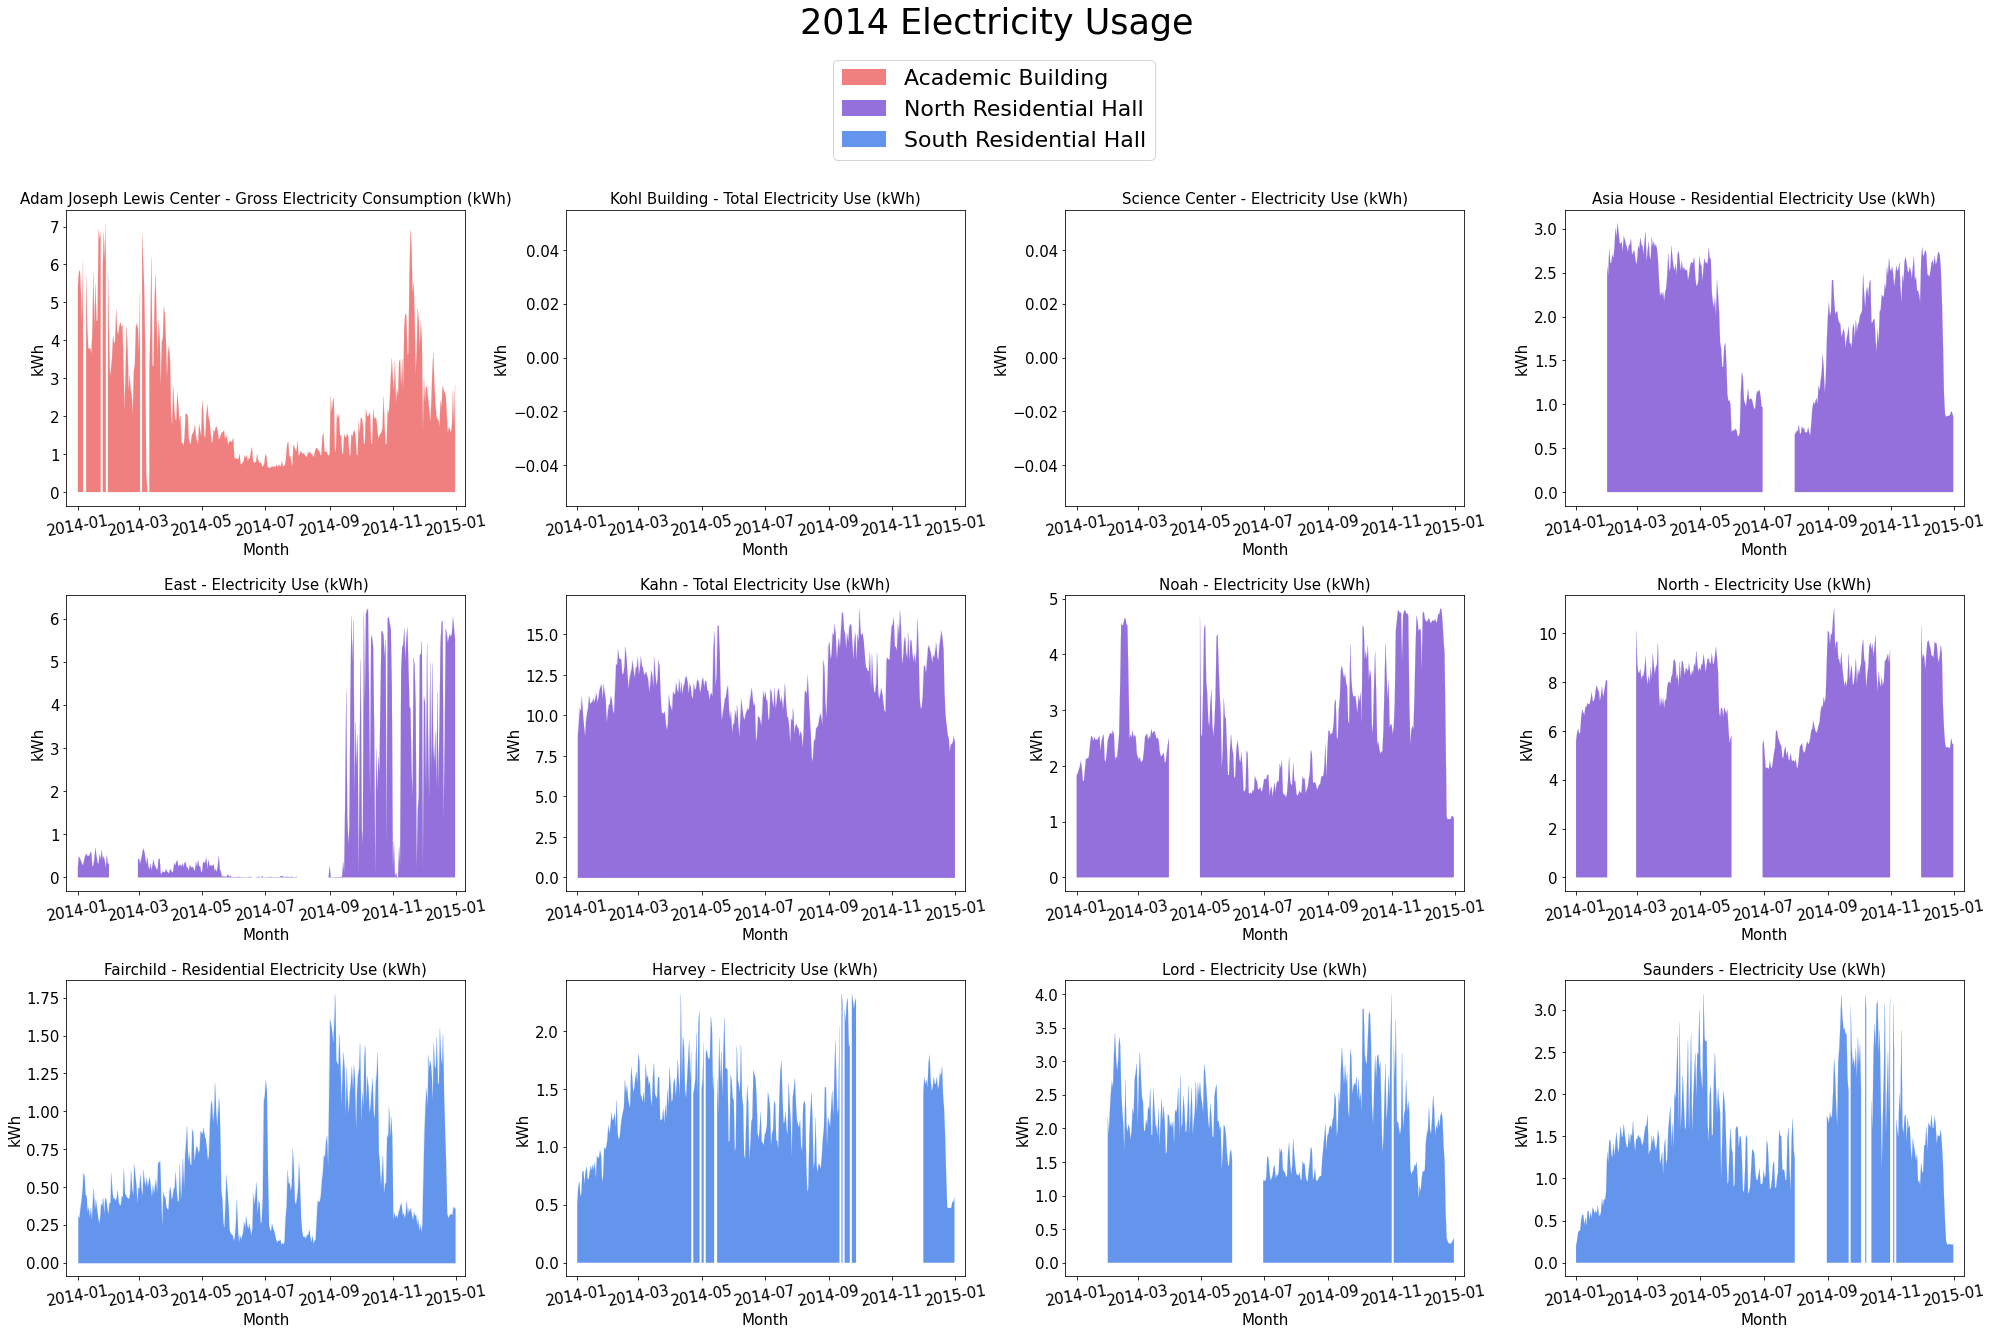

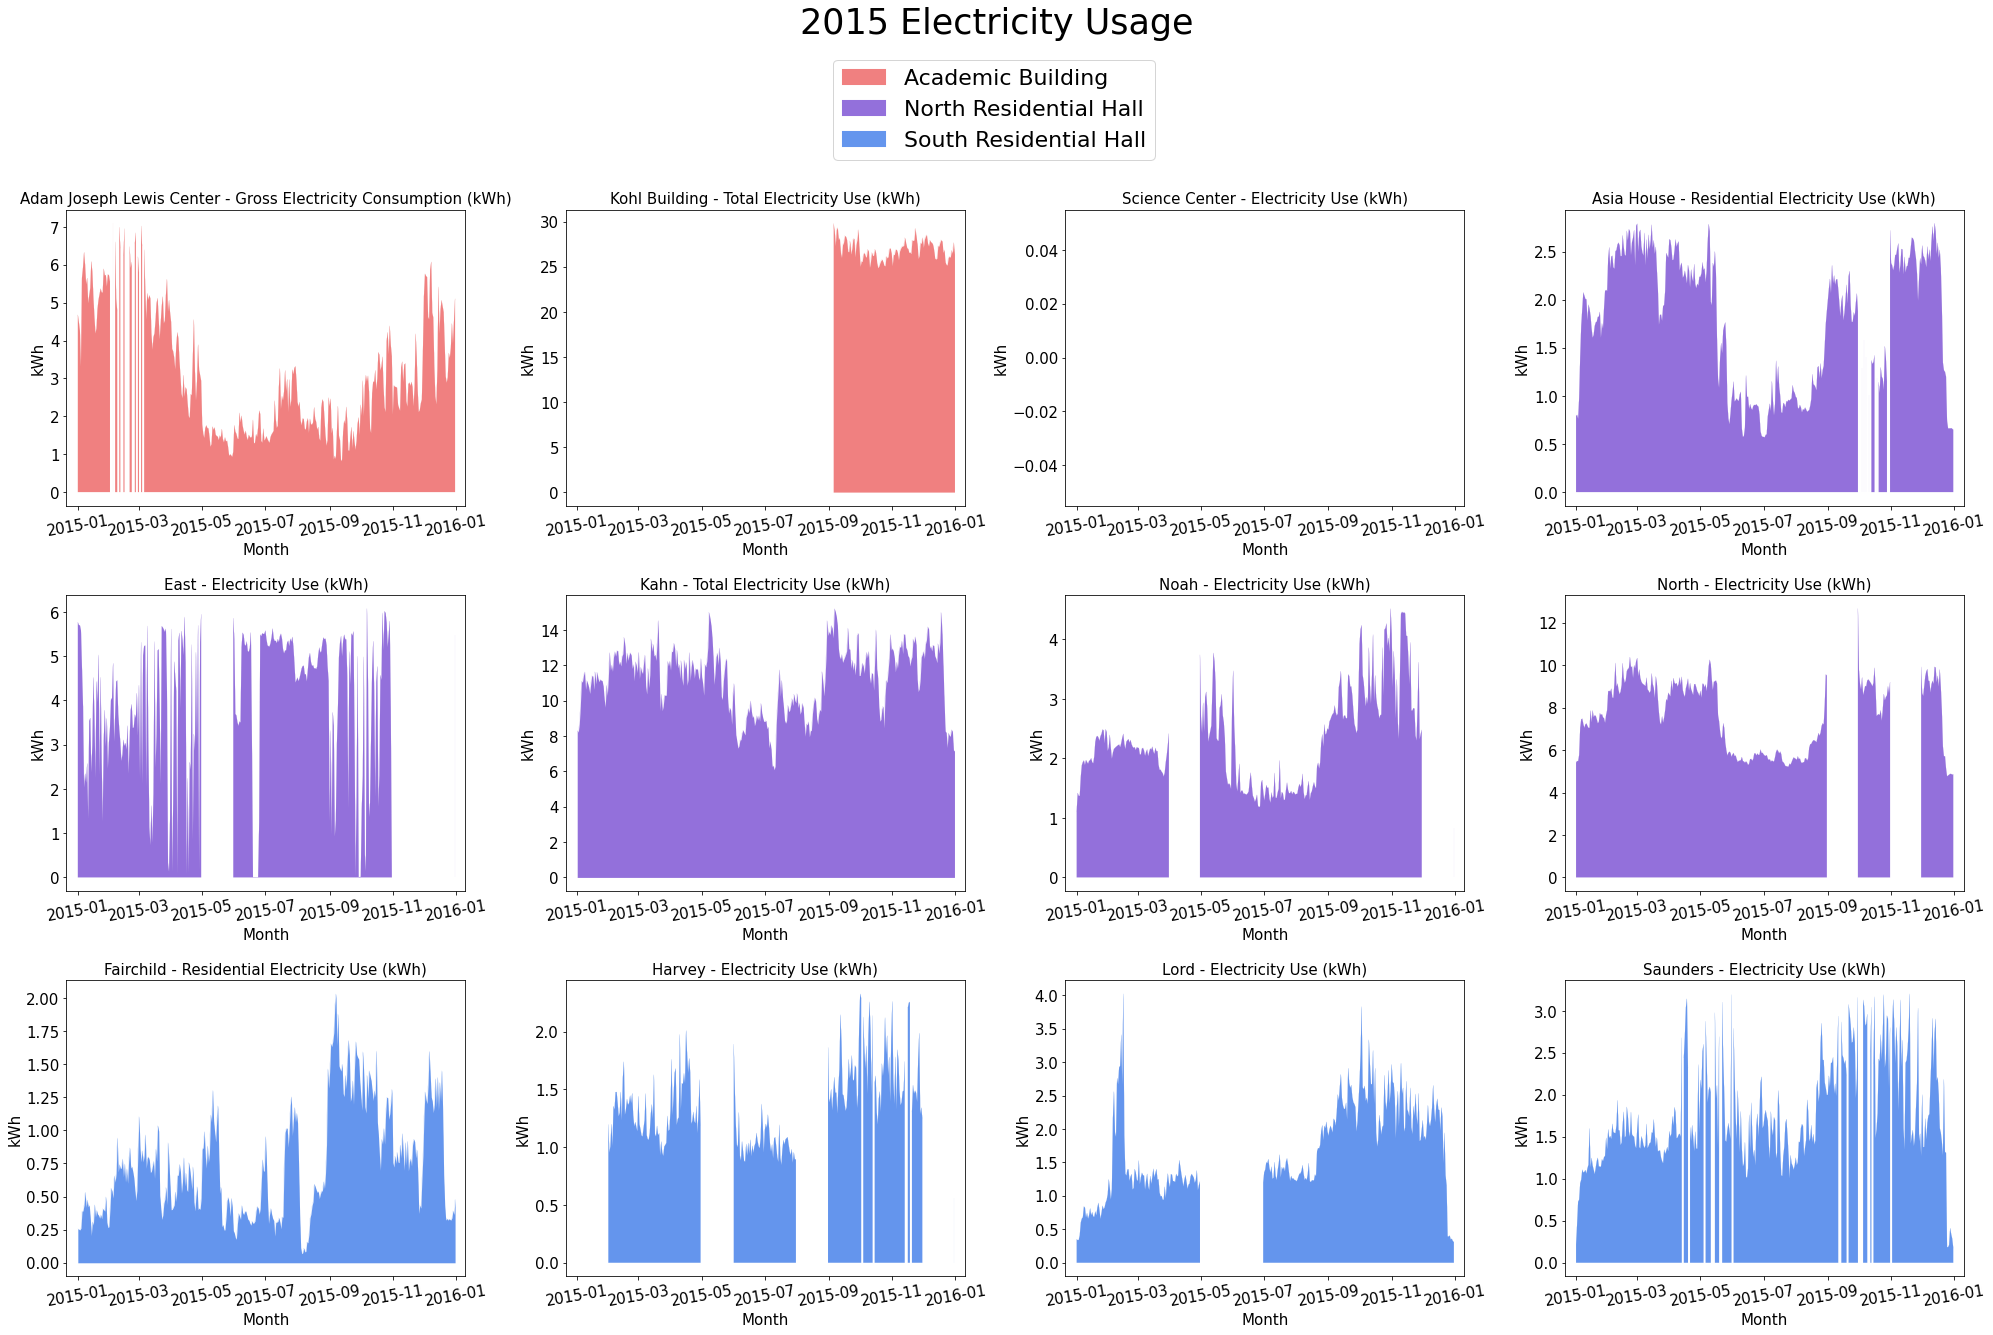

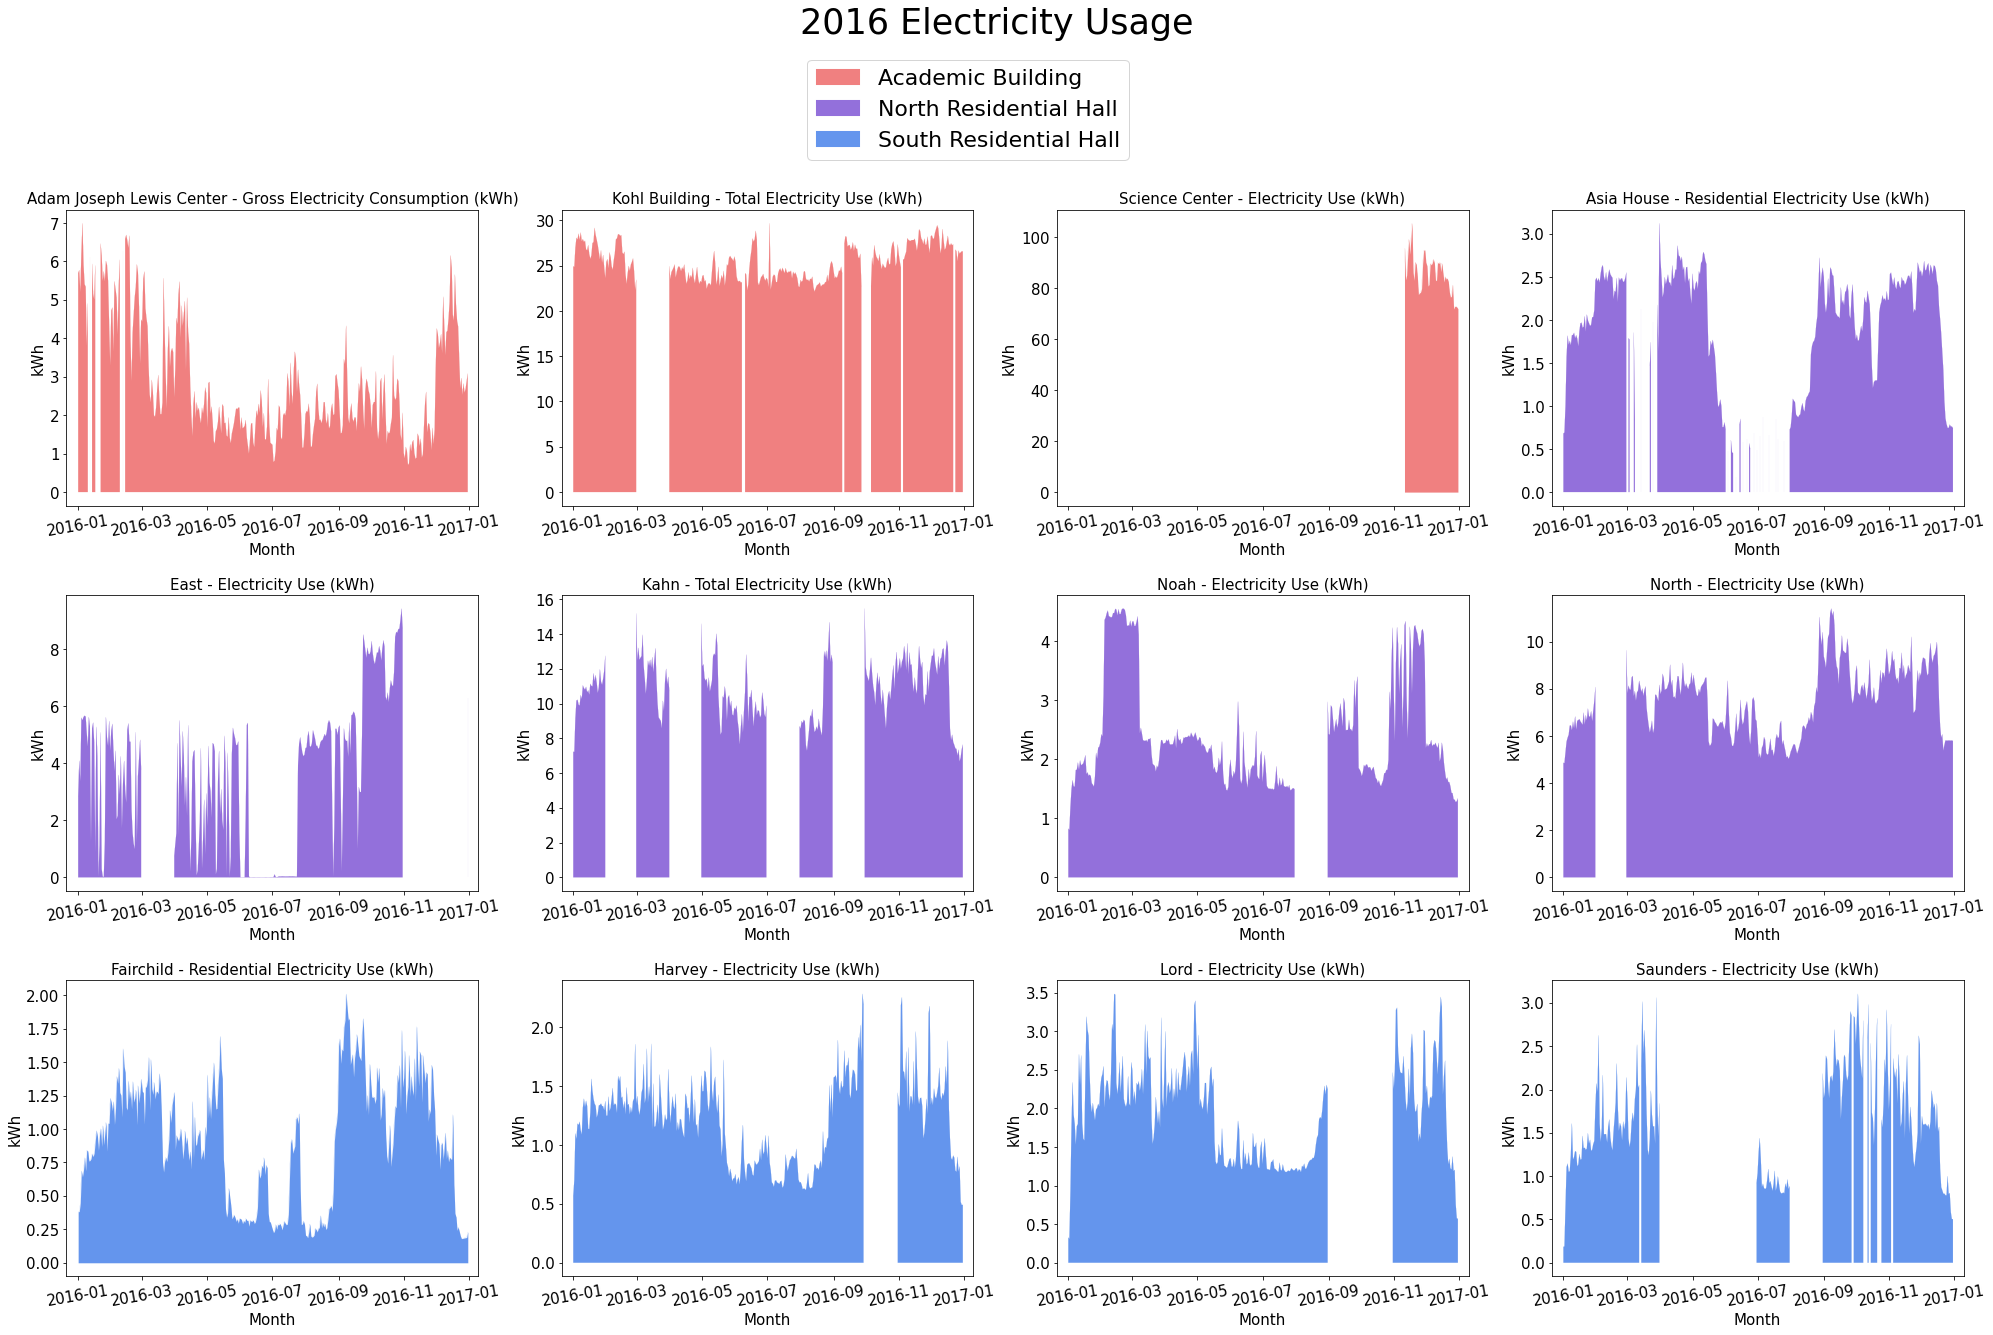

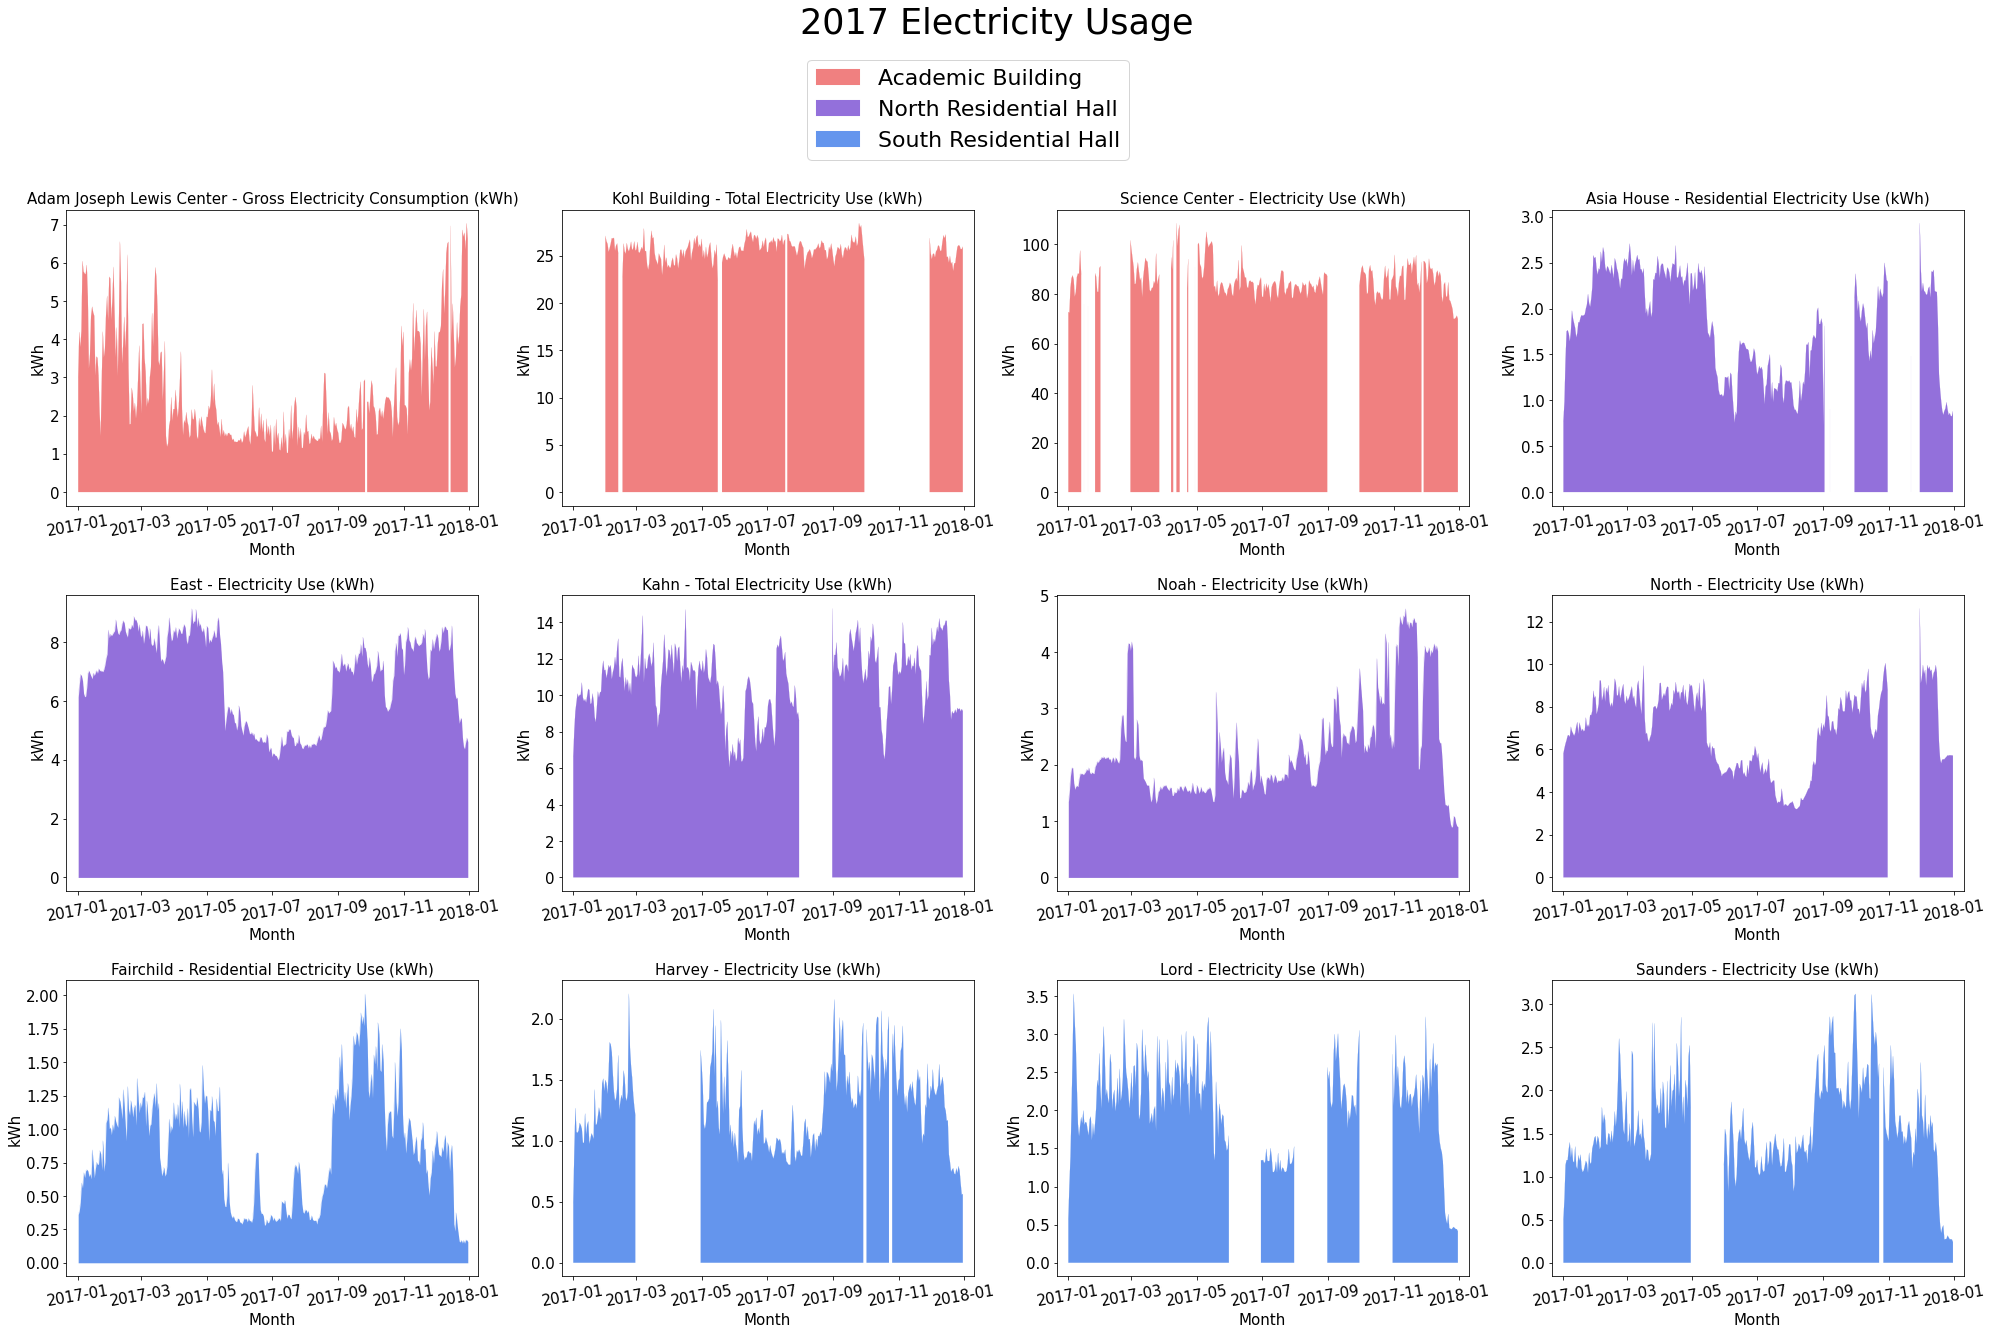

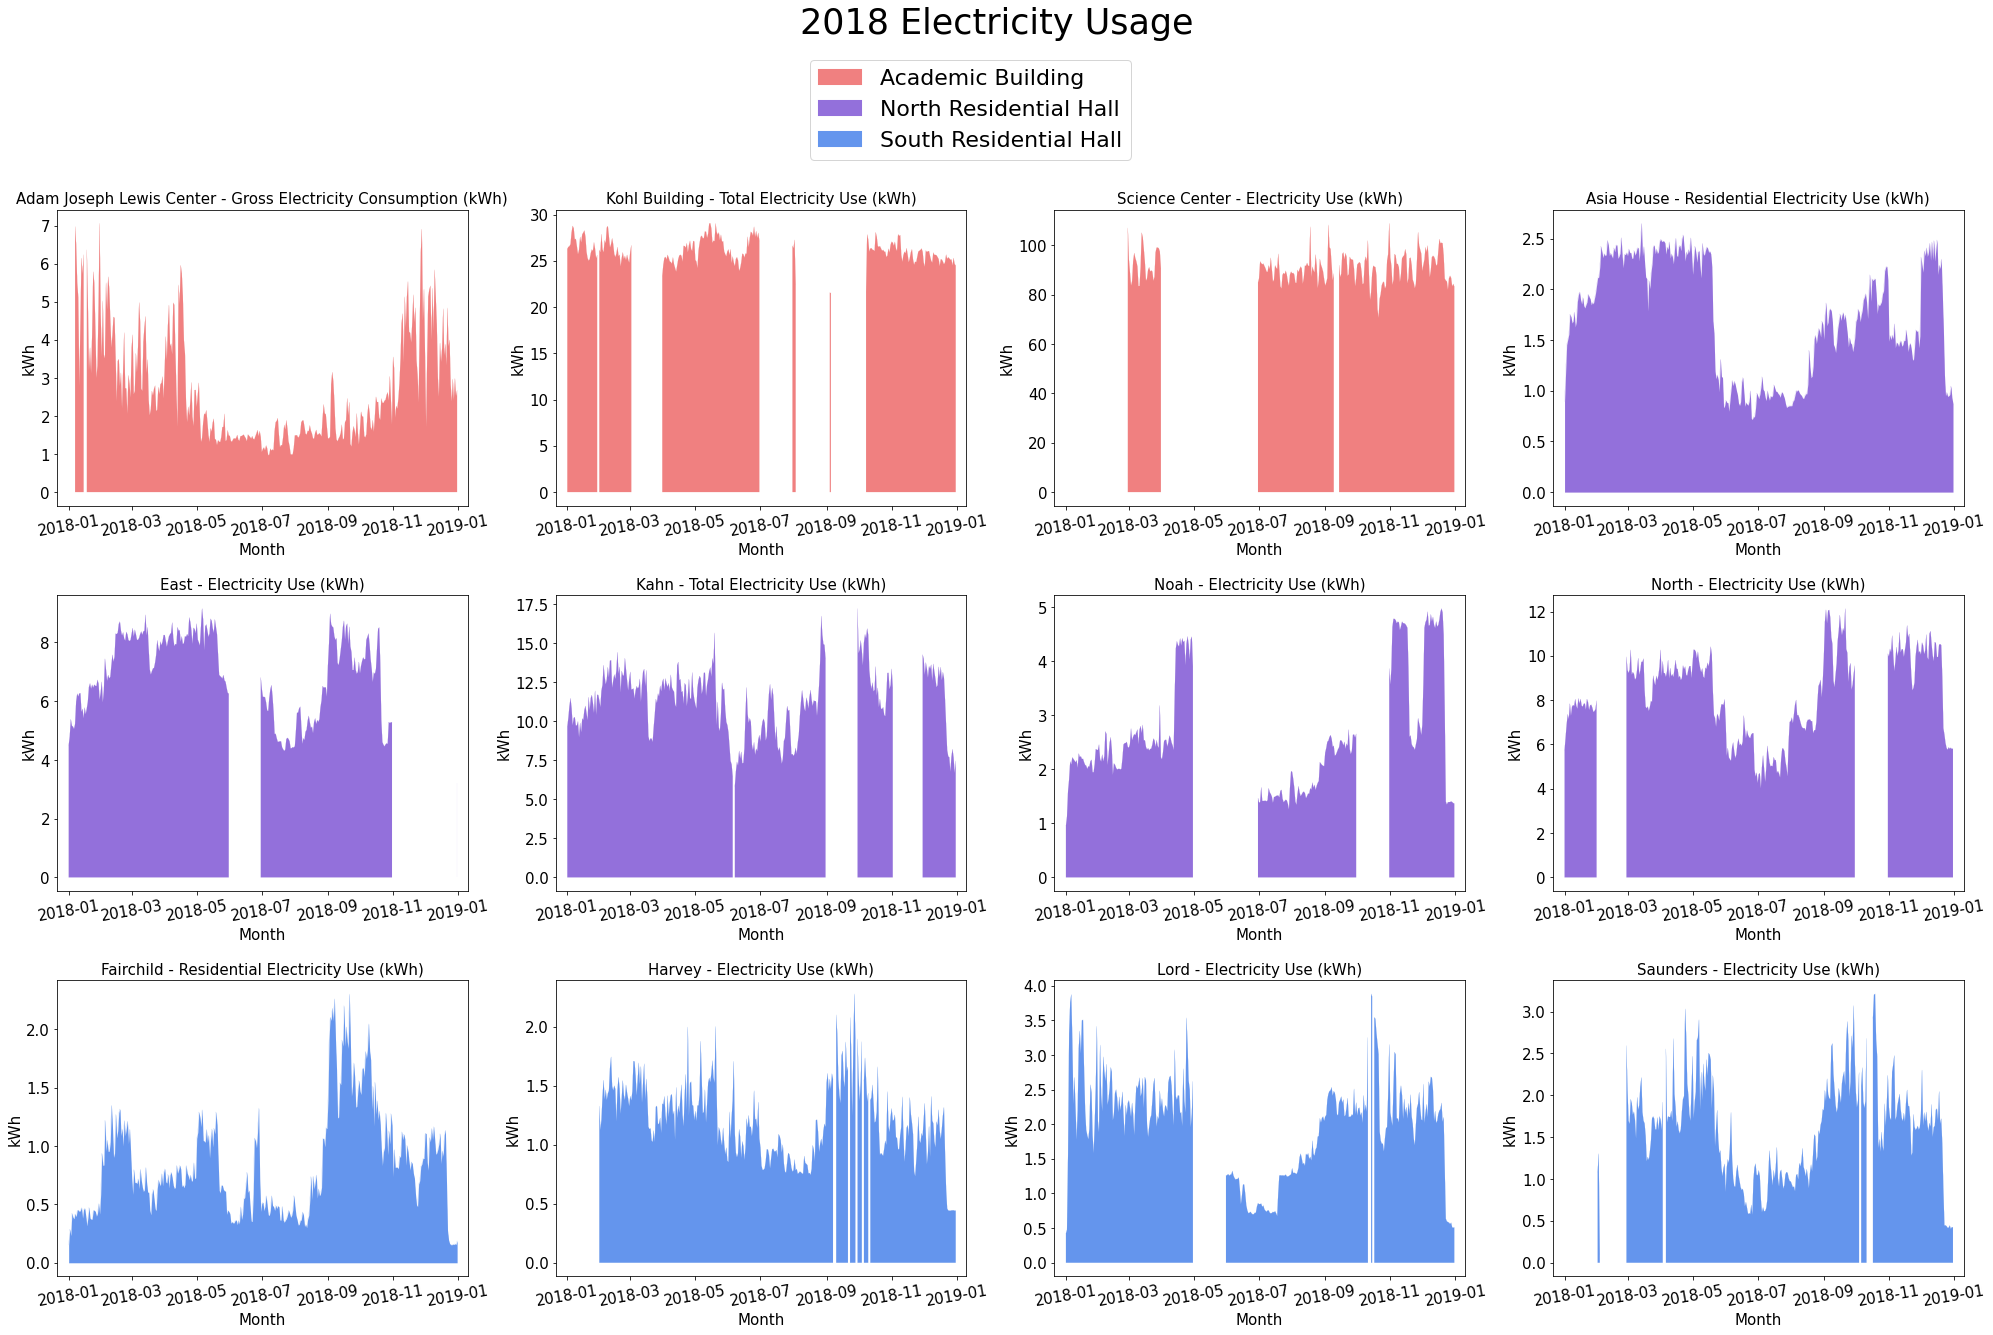

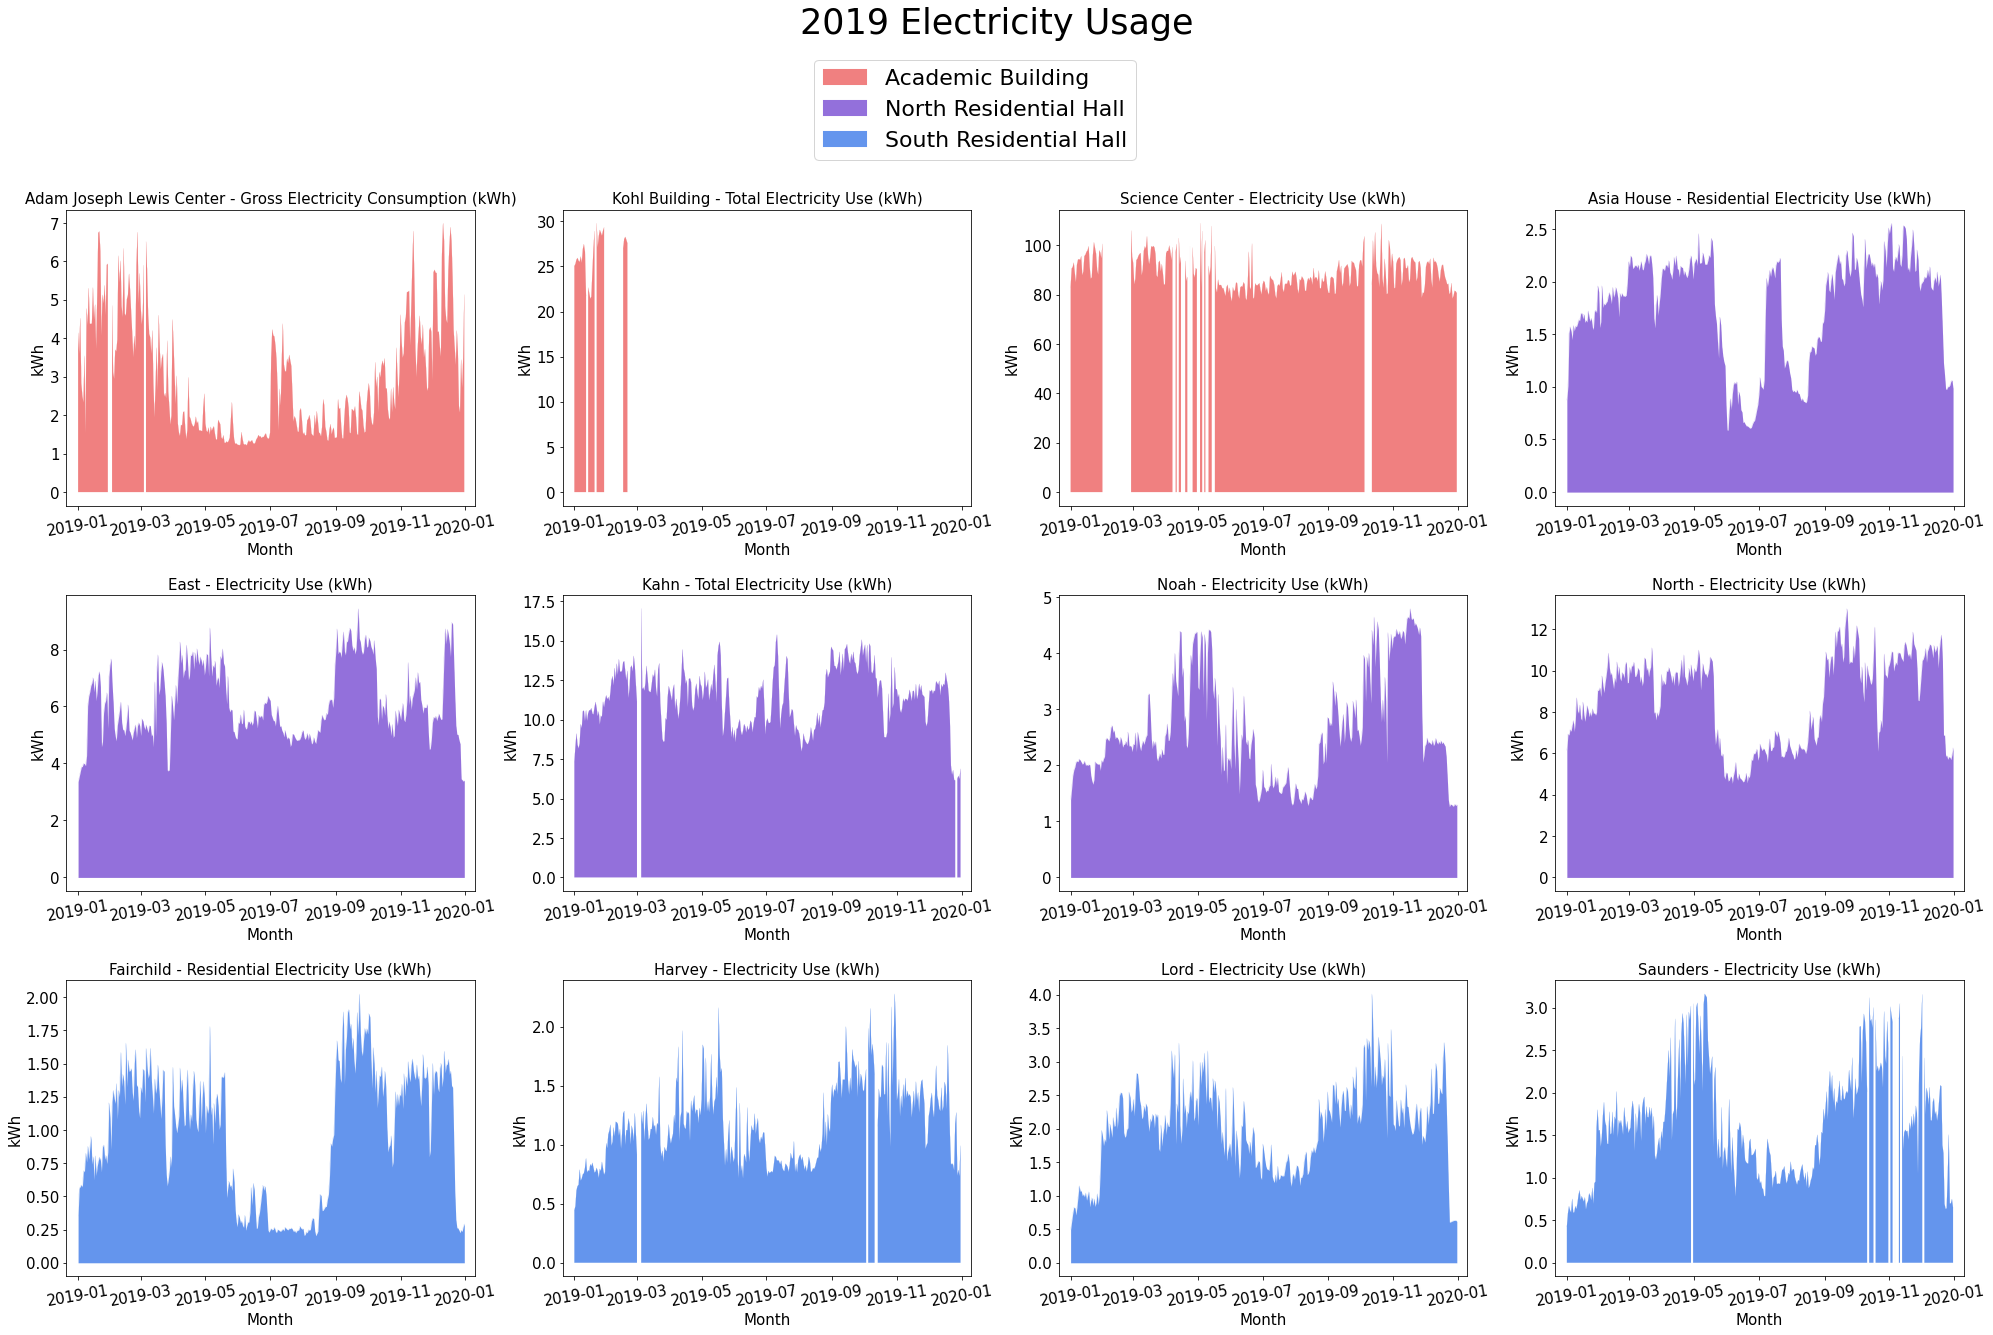

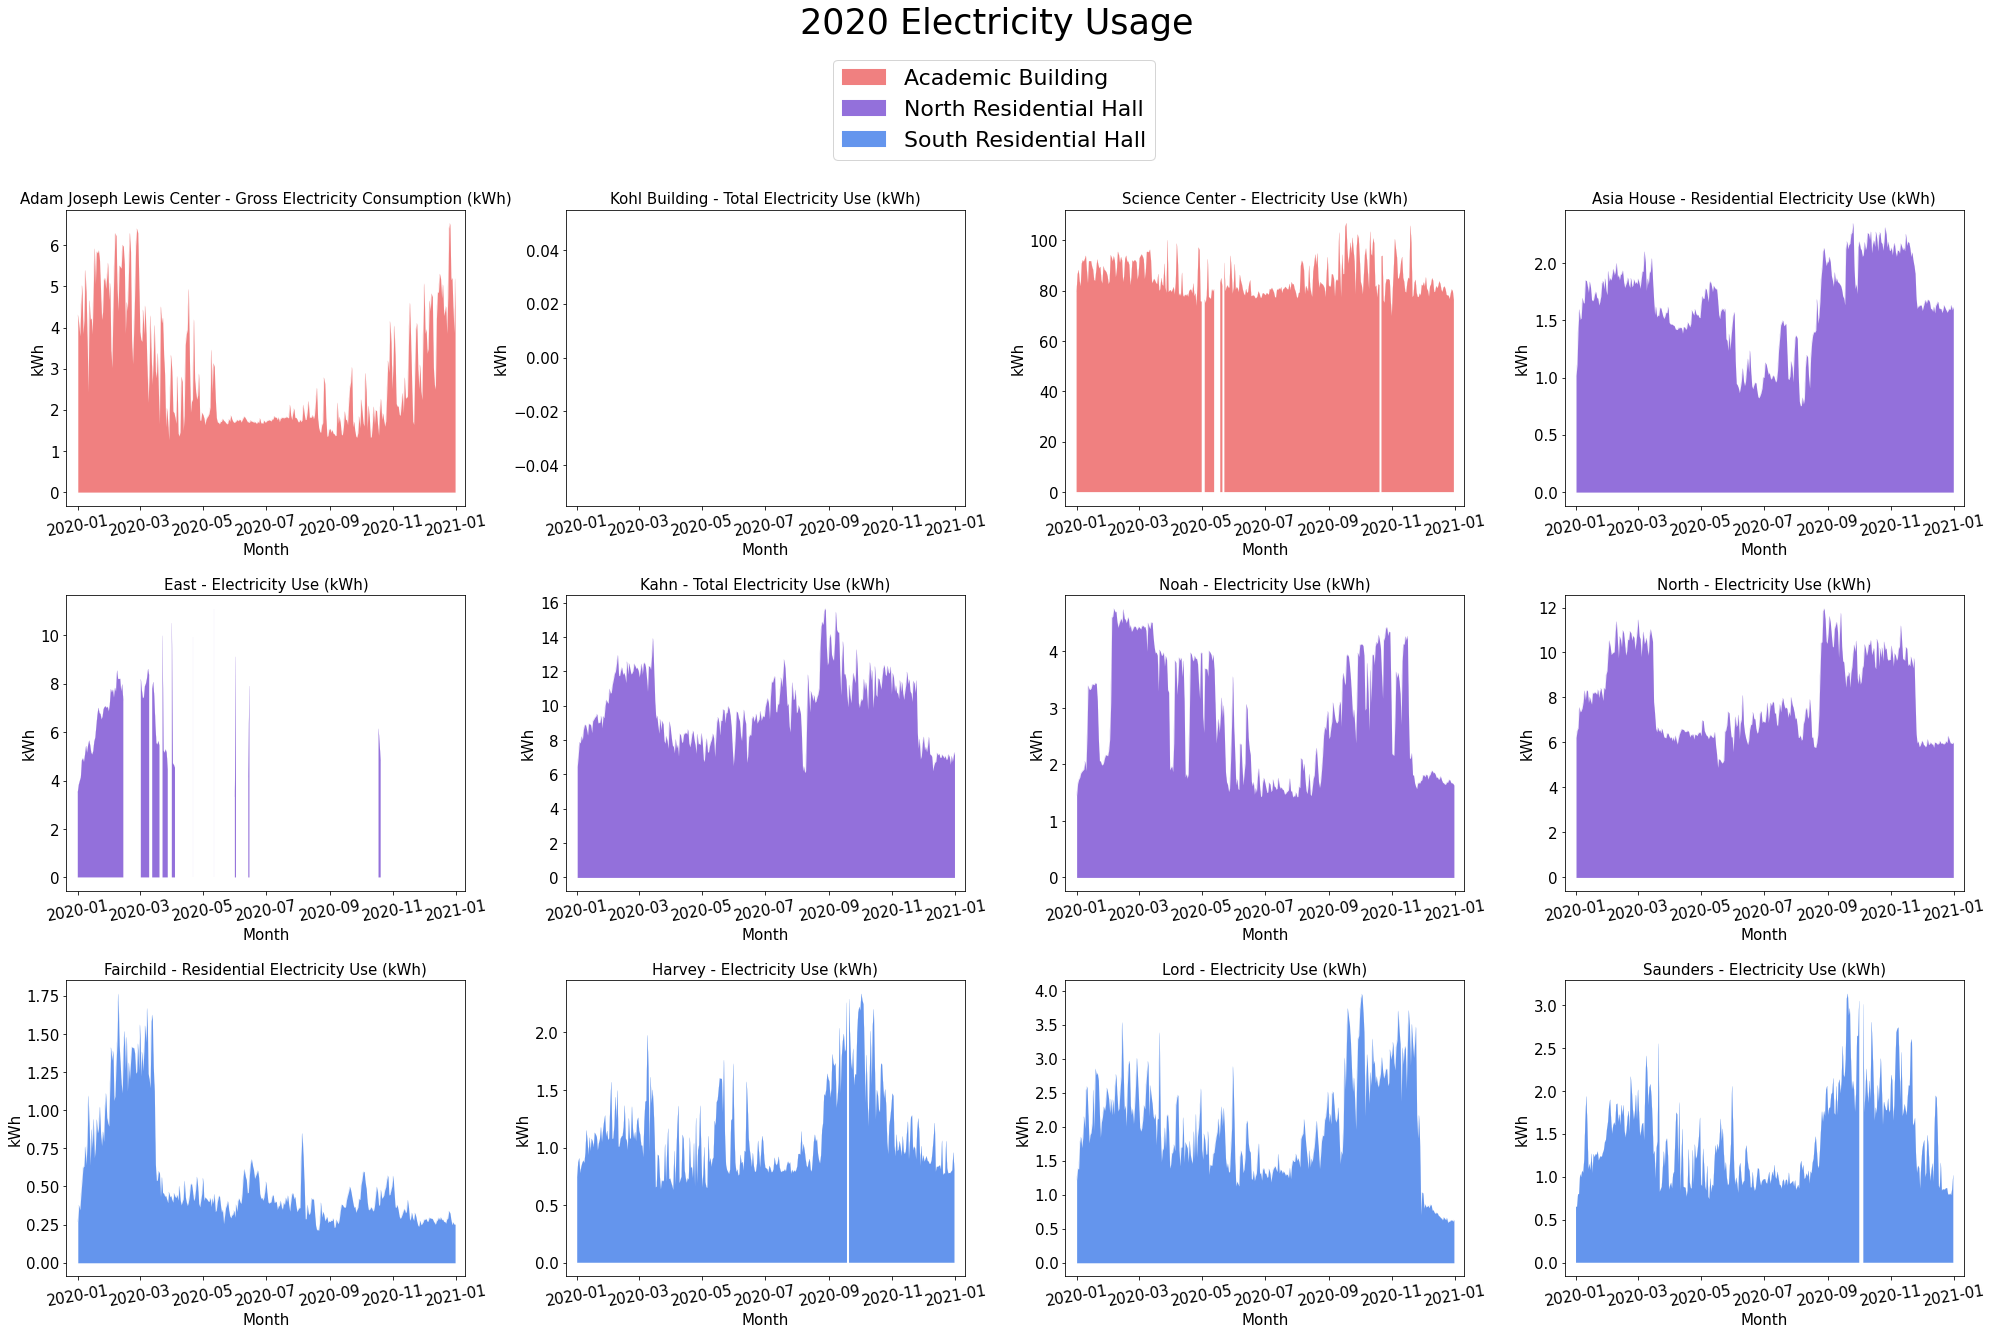

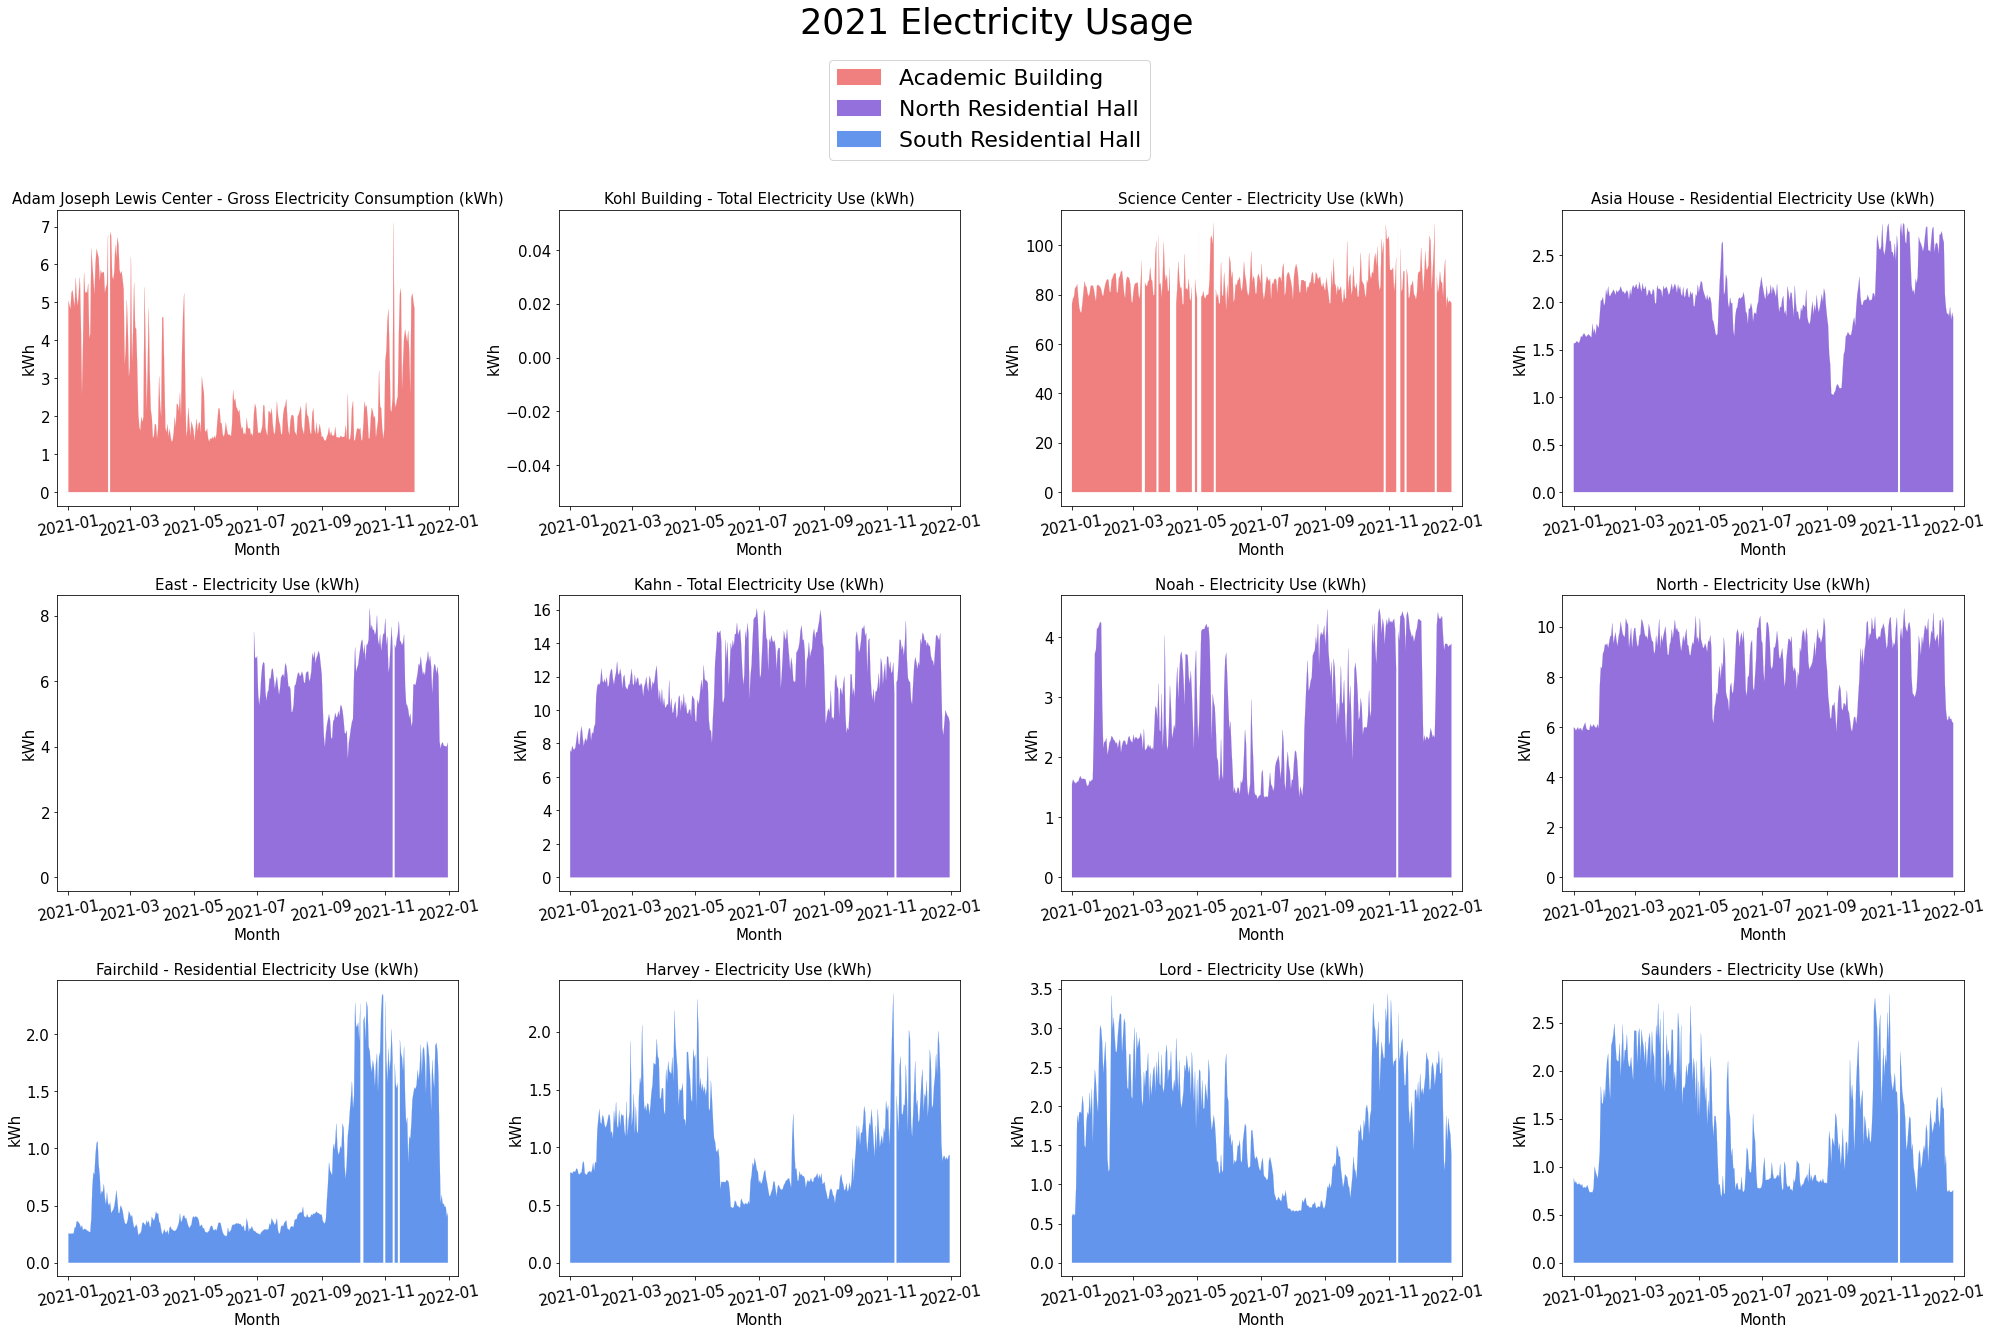

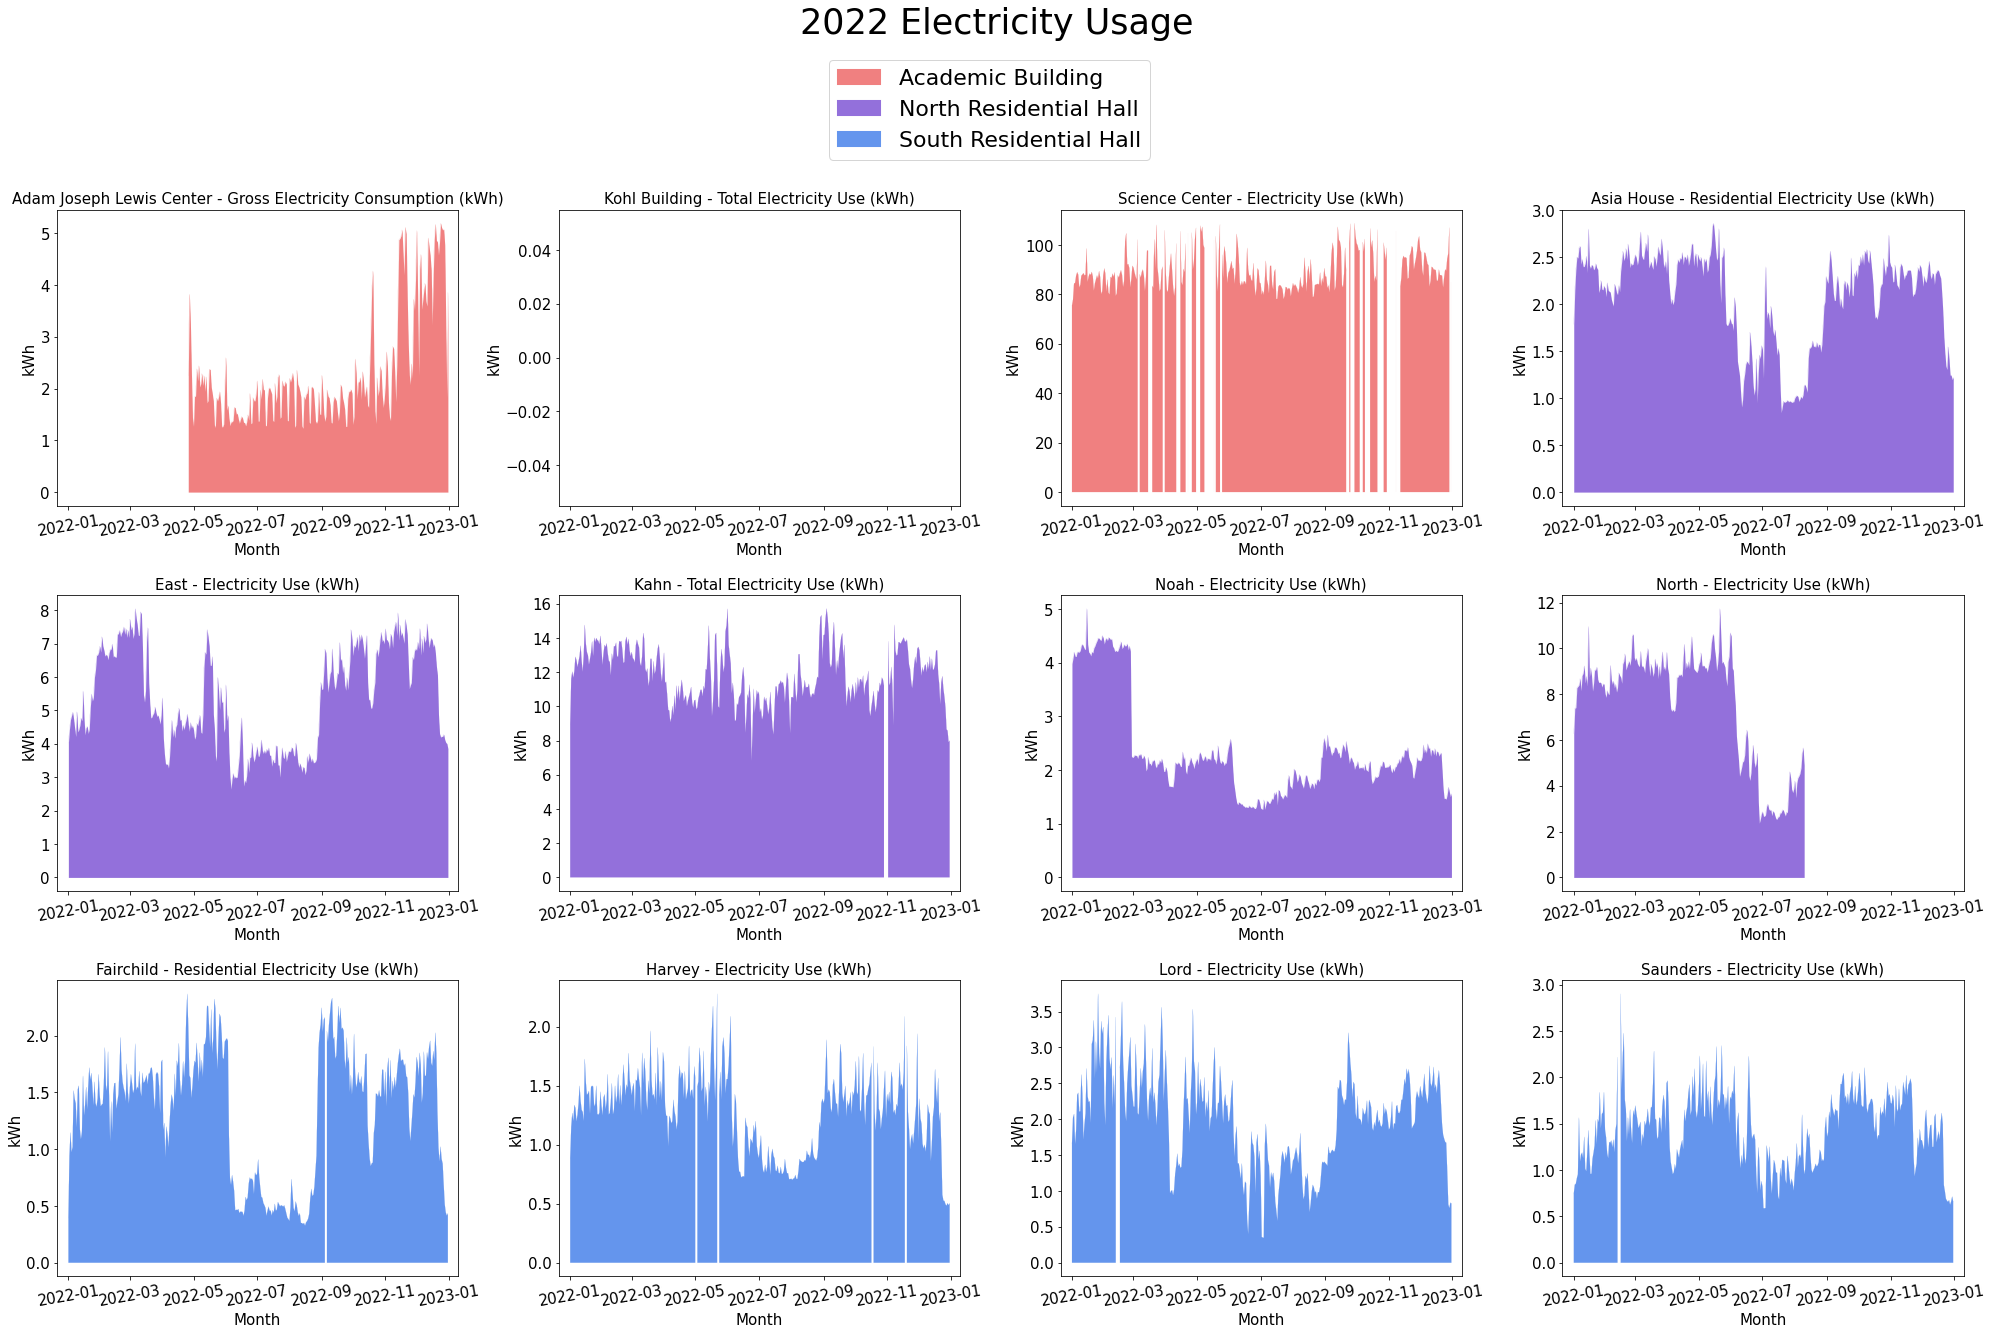

In [32]:
# get the building type and color code
def setCategories(col_num):
        if col_num < 3:
            return "Academic Building", "lightcoral"
        if col_num < 8:
            return "North Residential Hall", "mediumpurple"
        else:
            return "South Residential Hall", "cornflowerblue"

# Plot by year
def plot_by_year(year, data, fontsize = 15, margin = 10, labelrotation=10):
    year_data = data[data.index.year == year]

    col_num=0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
    fig.suptitle(str(year) +" Electricity Usage", fontsize = fontsize + 20)

    categories = {}
    
    for row in ax:
        for col in row:
            set_label, set_color = setCategories(col_num)
            col.plot(year_data.index, year_data[year_data.columns[col_num]], color=set_color, linewidth= 0.1) 
            label = col.fill_between(year_data.index, year_data[year_data.columns[col_num]], 0, label = set_label, color = set_color, linewidth= 0.05)
            
            if set_label not in categories:
                categories[set_label] = label
            
            col.set_xlabel("Month", fontsize=fontsize)
            col.set_ylabel("kWh", fontsize=fontsize)
            col.set_xlim([datetime.date(year-1, 12, 31-margin), datetime.date(year+1, 1, margin)]) #CHANGE
            col.set_title(year_data.columns[col_num], fontsize=fontsize)
            col.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
            col.tick_params(axis='x', labelsize=fontsize, labelrotation = labelrotation)
            col.tick_params(axis='y', labelsize=fontsize)
            col_num+=1
            
    plt.tight_layout(pad=9, w_pad=0.5, h_pad=2)
    
    plt.legend(handles=categories.values(), bbox_to_anchor=[-1, 4.15], fontsize=fontsize+7)
    plt.savefig(f"./Graphs/Year/{year}_Electrical.png")    #CHANGE SAVE PLOT

    return fig
#     # Plot from 2013 to 2023
for year in range(2013, 2023):
    plot_by_year(year, data)


In [ ]:
# Plot by dorm
def plot_by_dorm(data, col_num, fontsize = 15, margin = 10):
    # get color code and building type
    set_label, set_color = setCategories(col_num)
    
    #plot bar figure
    plt.figure(figsize=(15, 10))
    plt.plot(data.index, data, label = set_label, color = set_color, linewidth= 0.4)
    plt.fill_between(data.index, data, 0, color = set_color, linewidth= 0.1)
    plt.xlabel("Year", fontsize=fontsize)
    plt.ylabel("kWh", fontsize=fontsize)
    plt.title(data.name, fontsize=fontsize)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)
    
    # show every year on x_axis
    plt.gca().xaxis.set_major_locator(mdate.YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()            
    # plt.tight_layout()
    
    # show building type in legend
    plt.legend(loc = "upper right")

    plt.savefig(f"./Graphs/Building/{data.name}_Electrical.png")

# col_num = 9
# plot_by_dorm(ordered_data[test_data.columns[col_num]], col_num)
for col_num in range(len(data.columns)):
    plot_by_dorm(data[data.columns[col_num]], col_num)

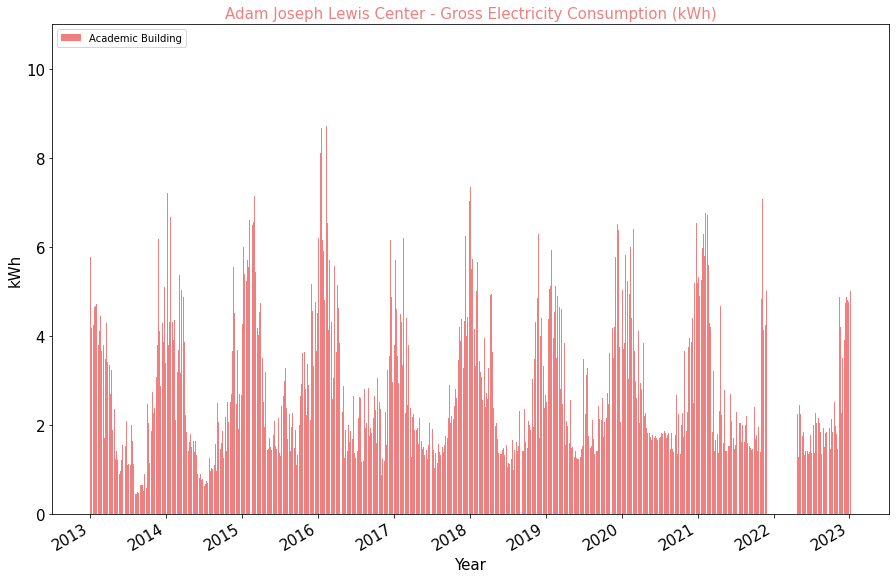

In [397]:
plot_by_dorm(data[data.columns[0]], 0)

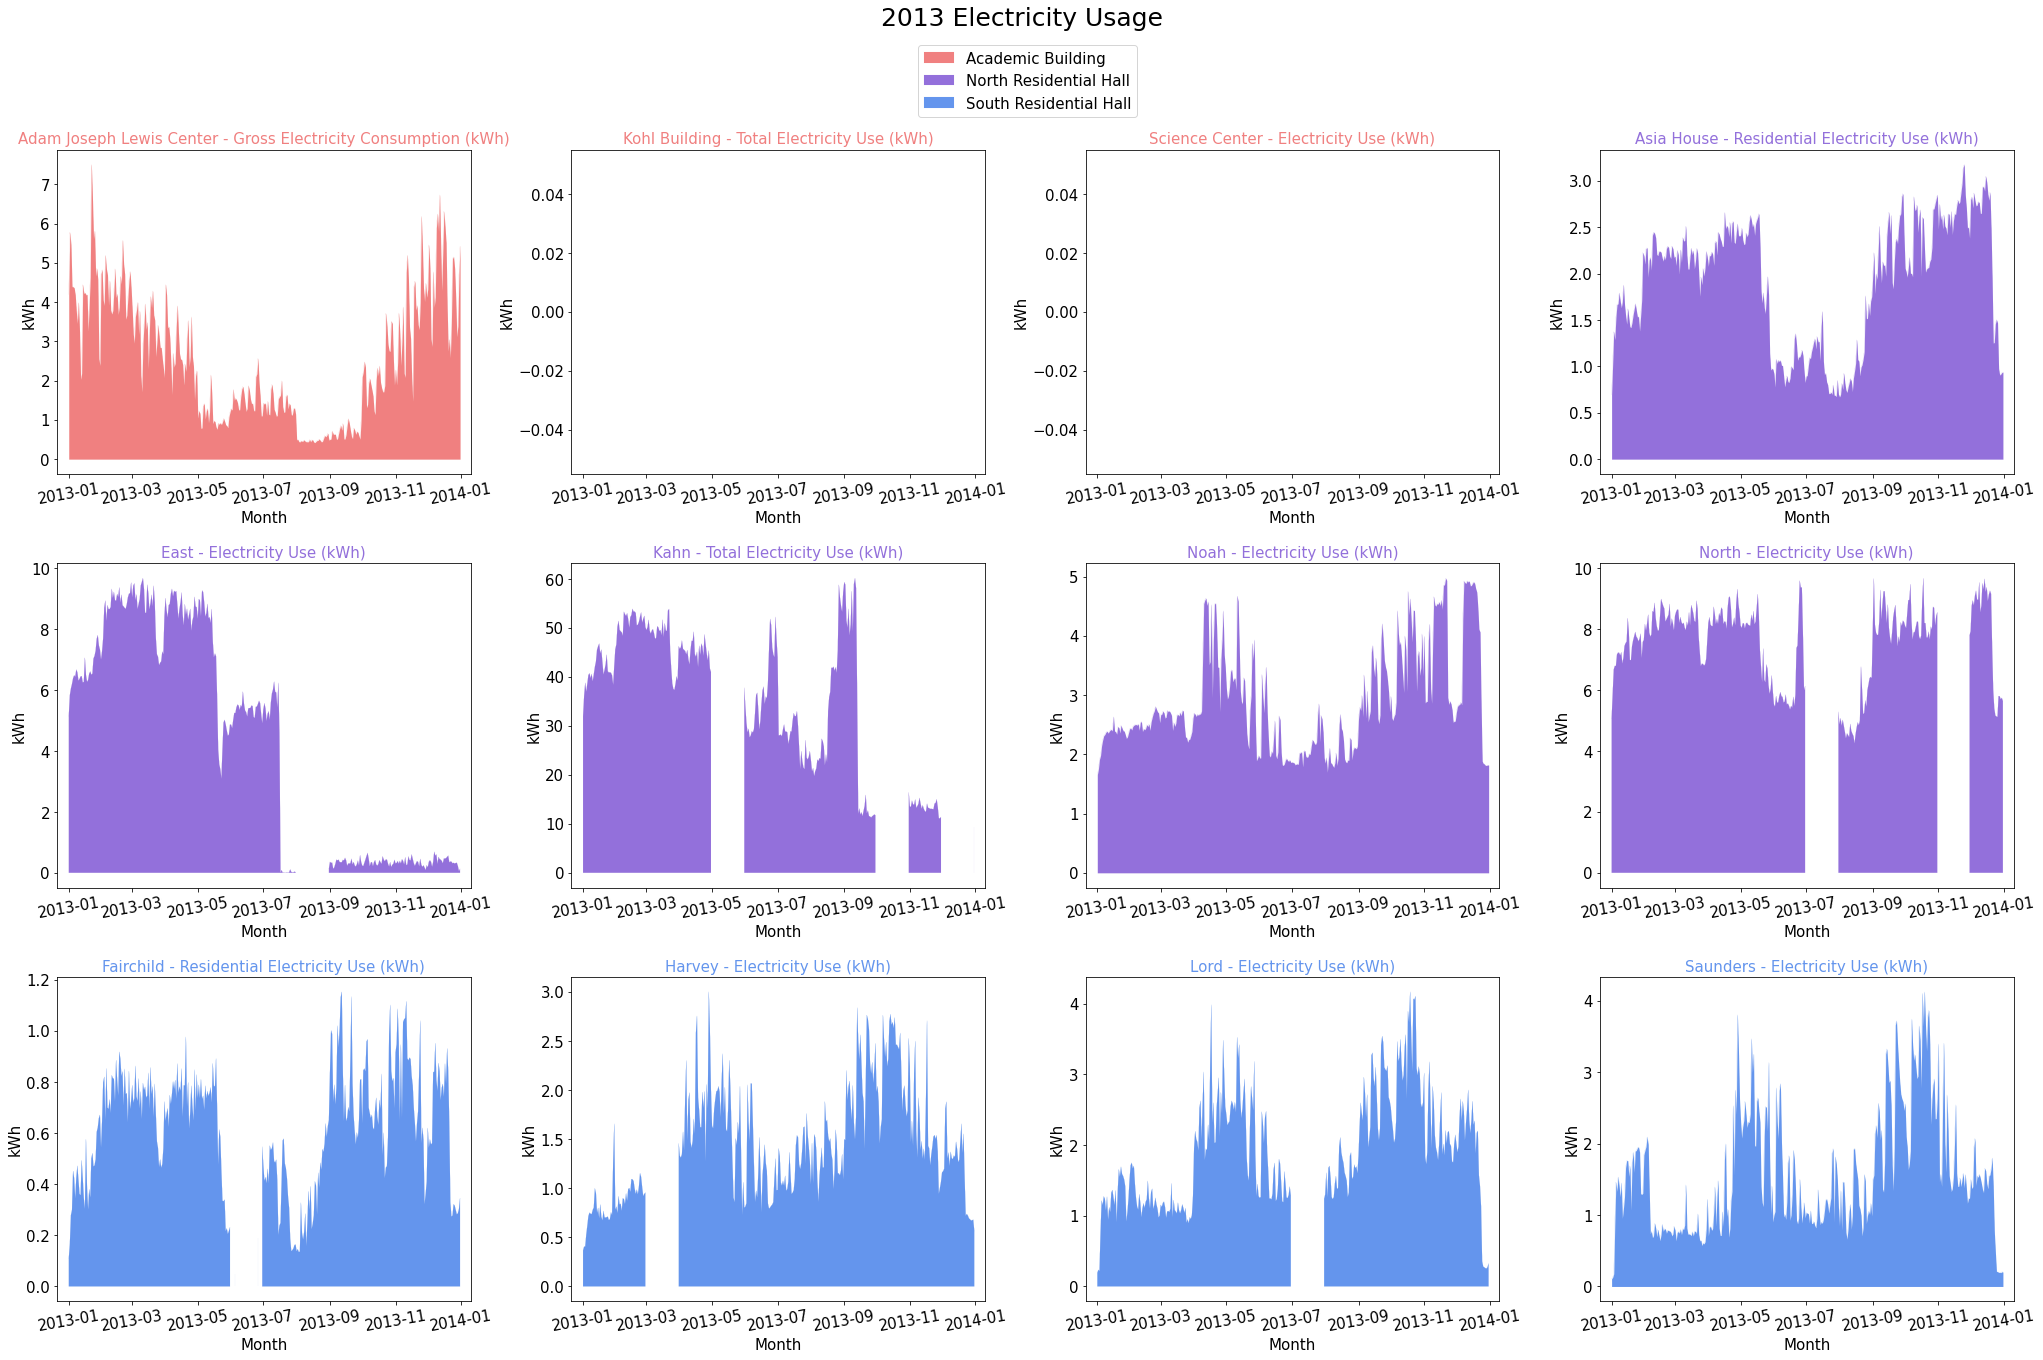

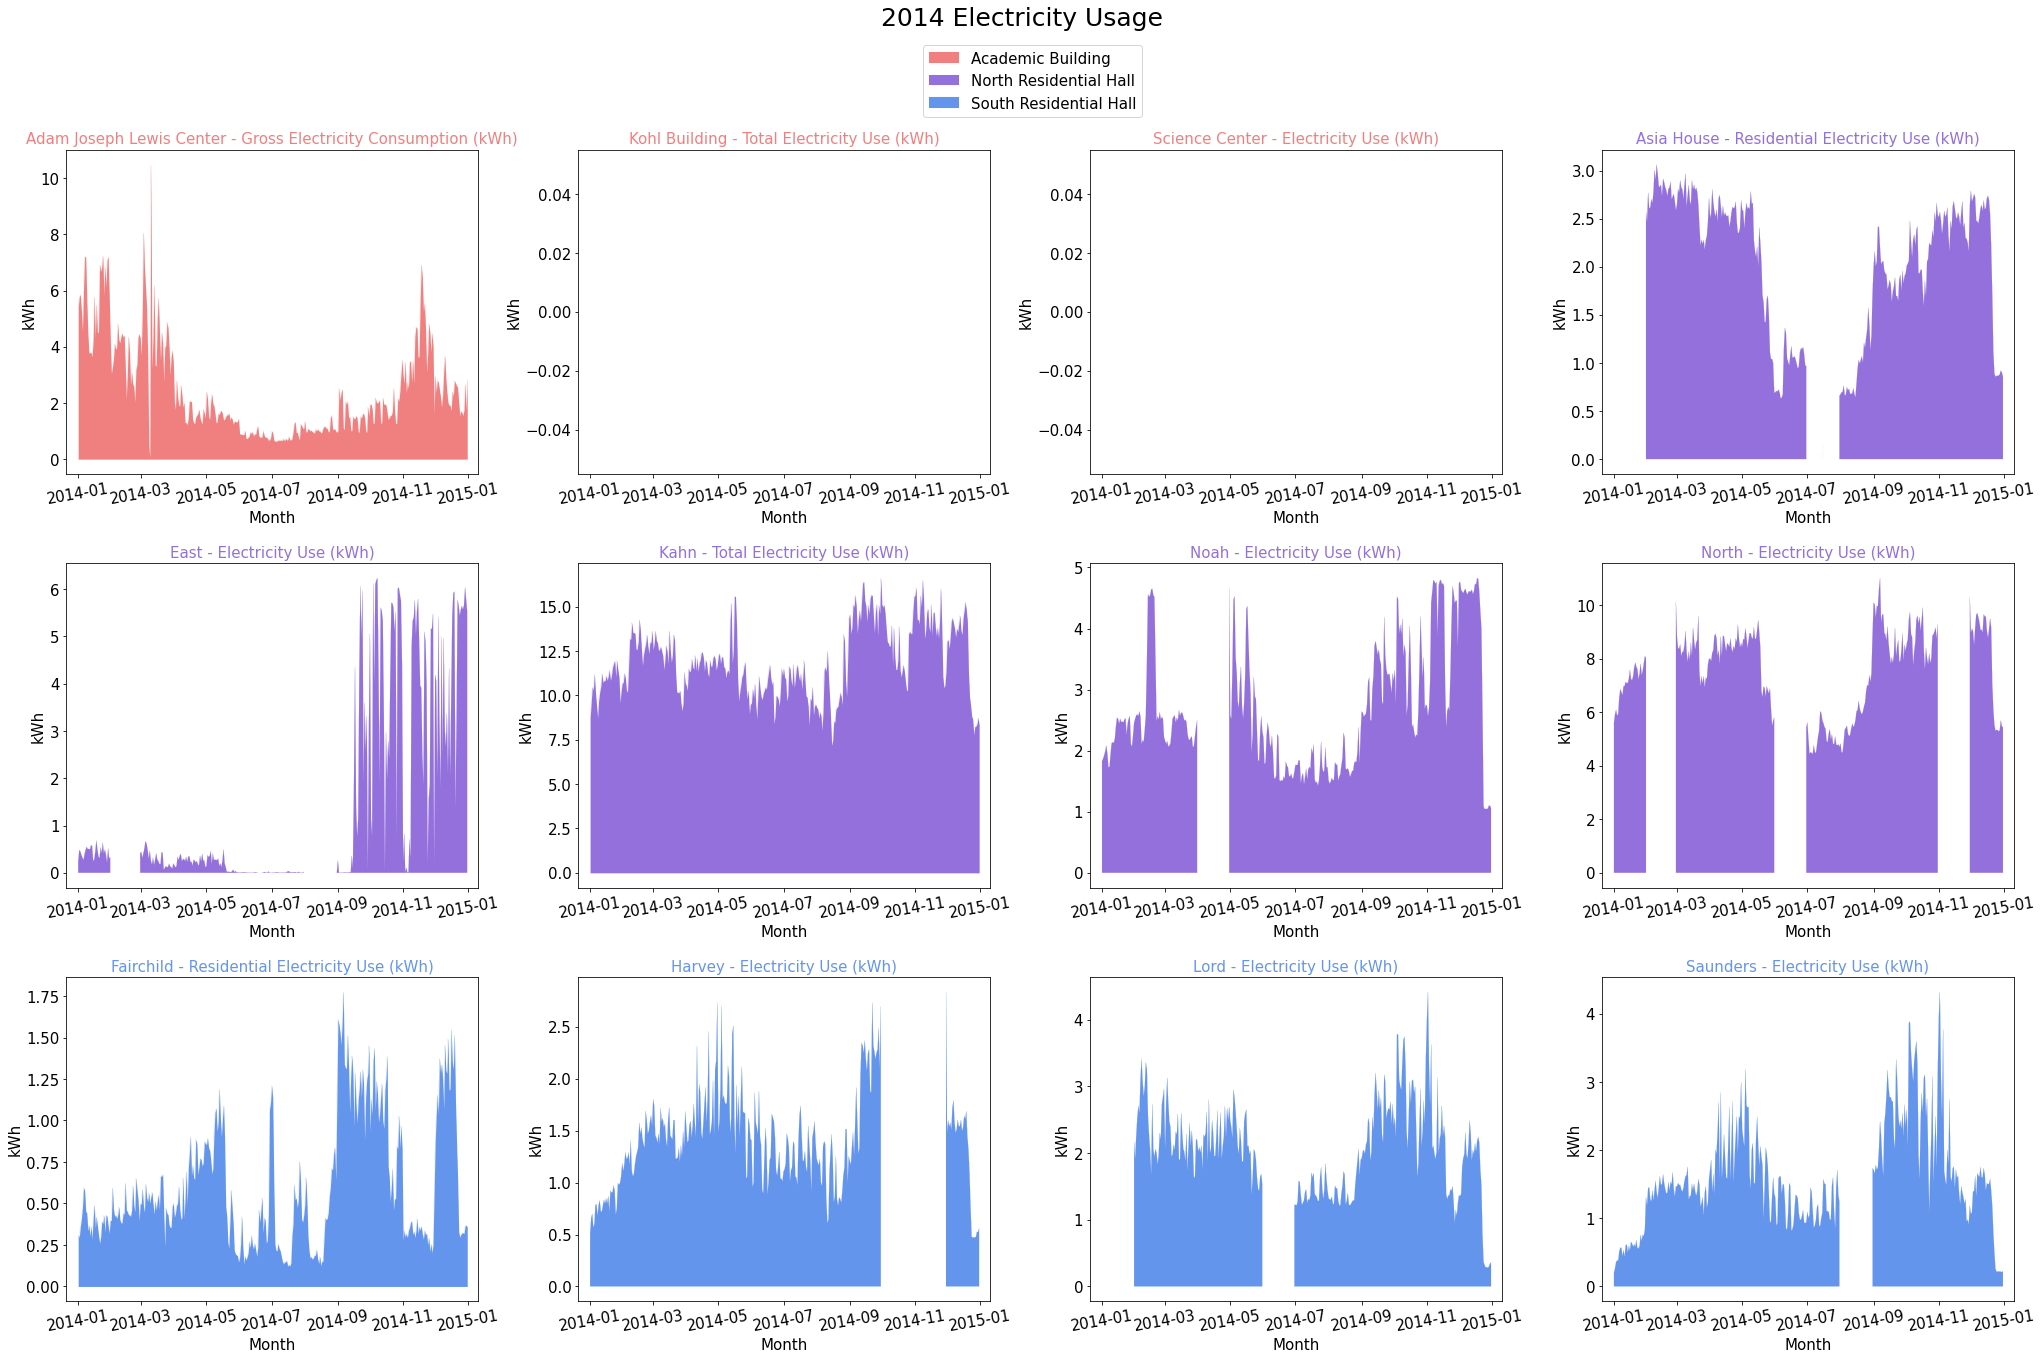

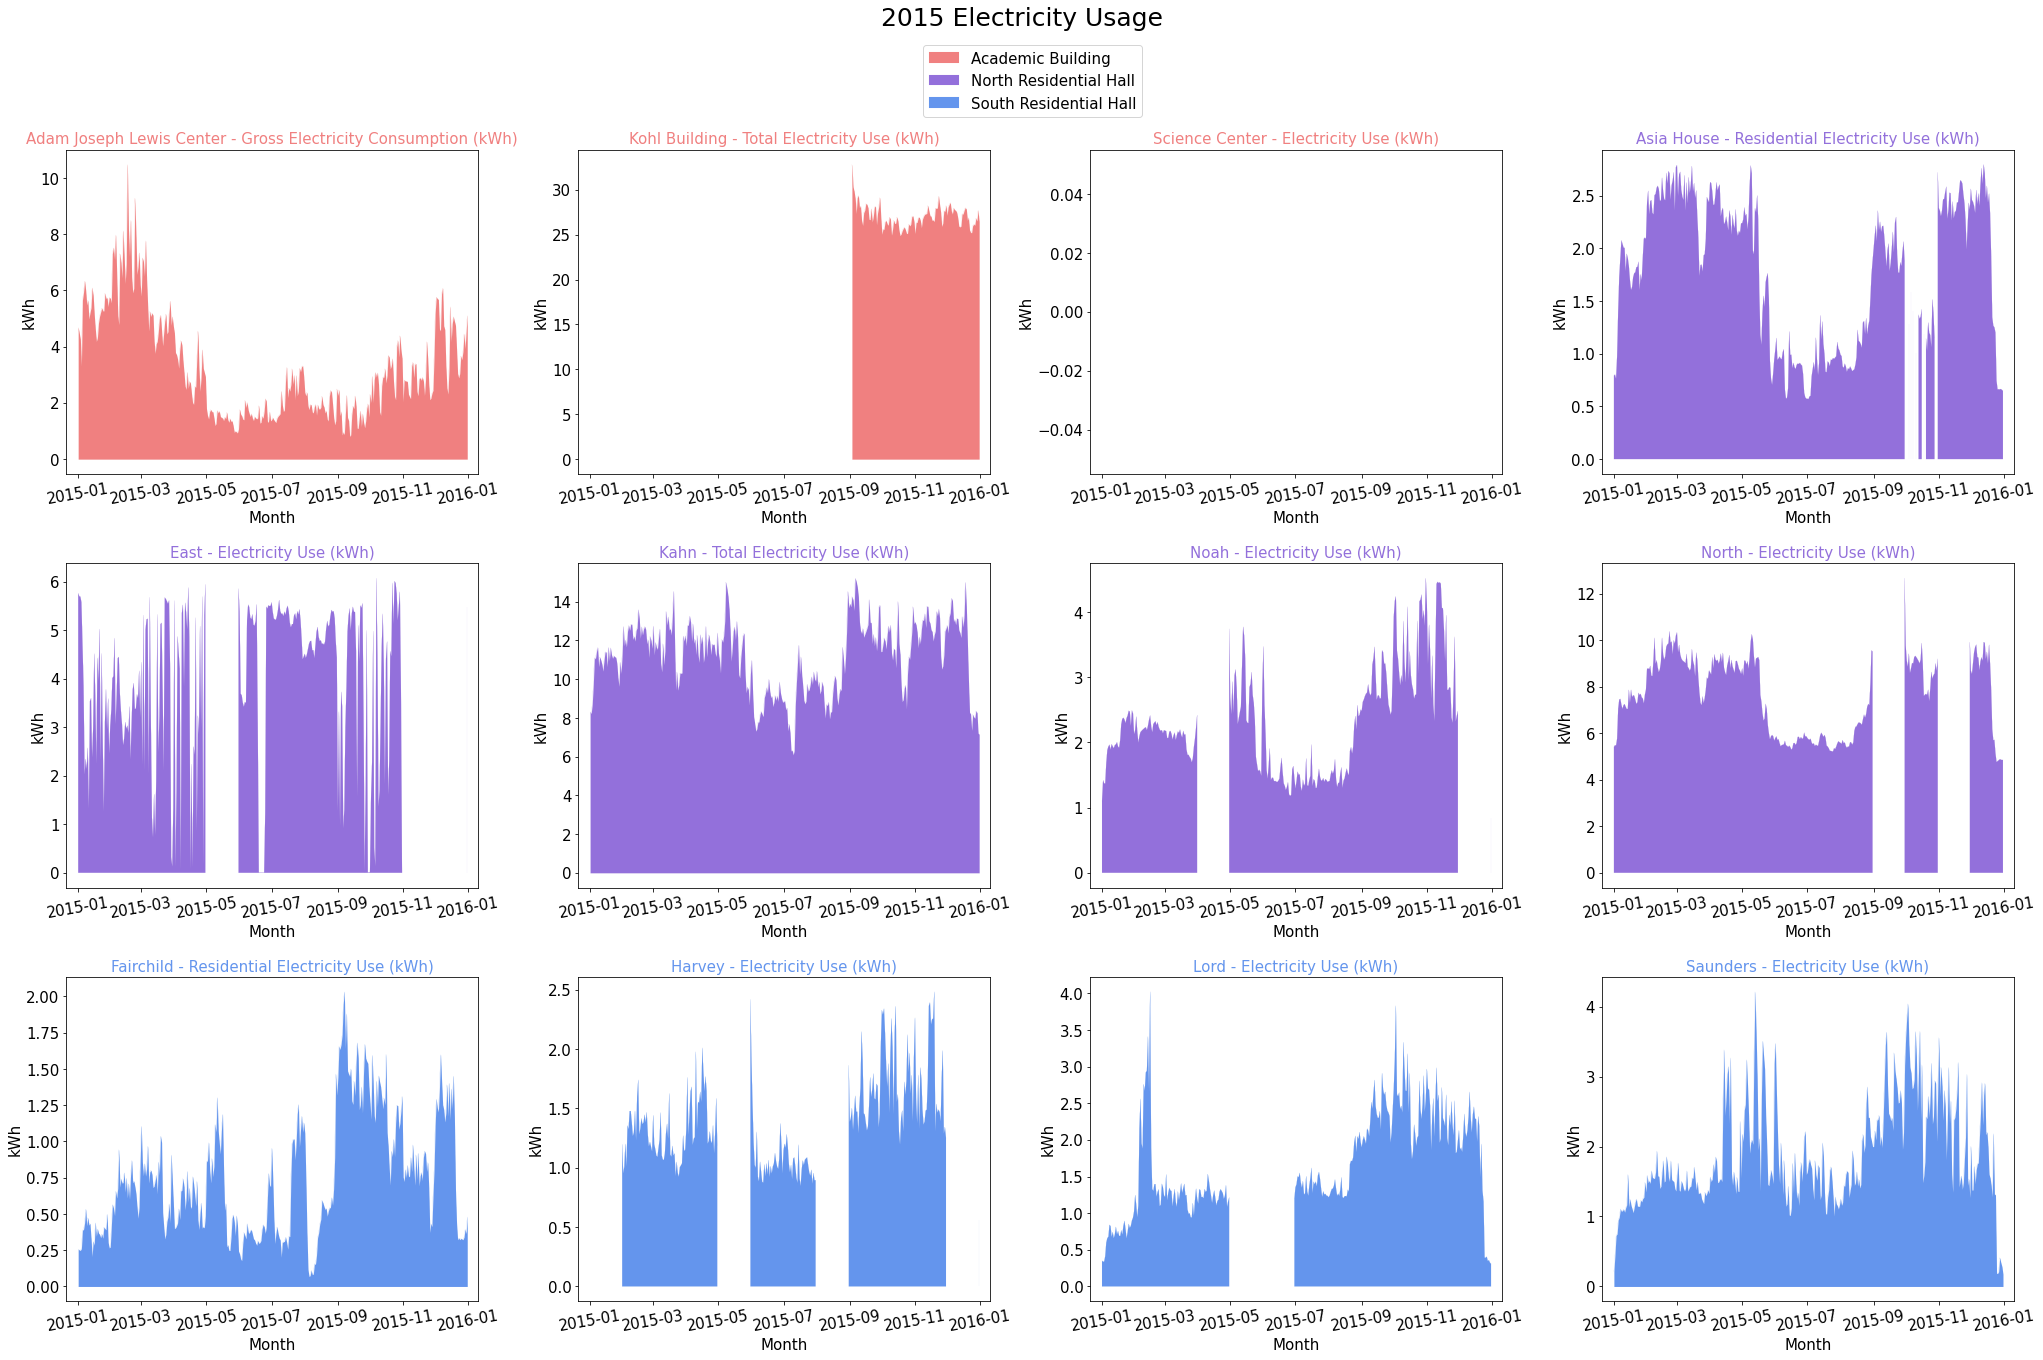

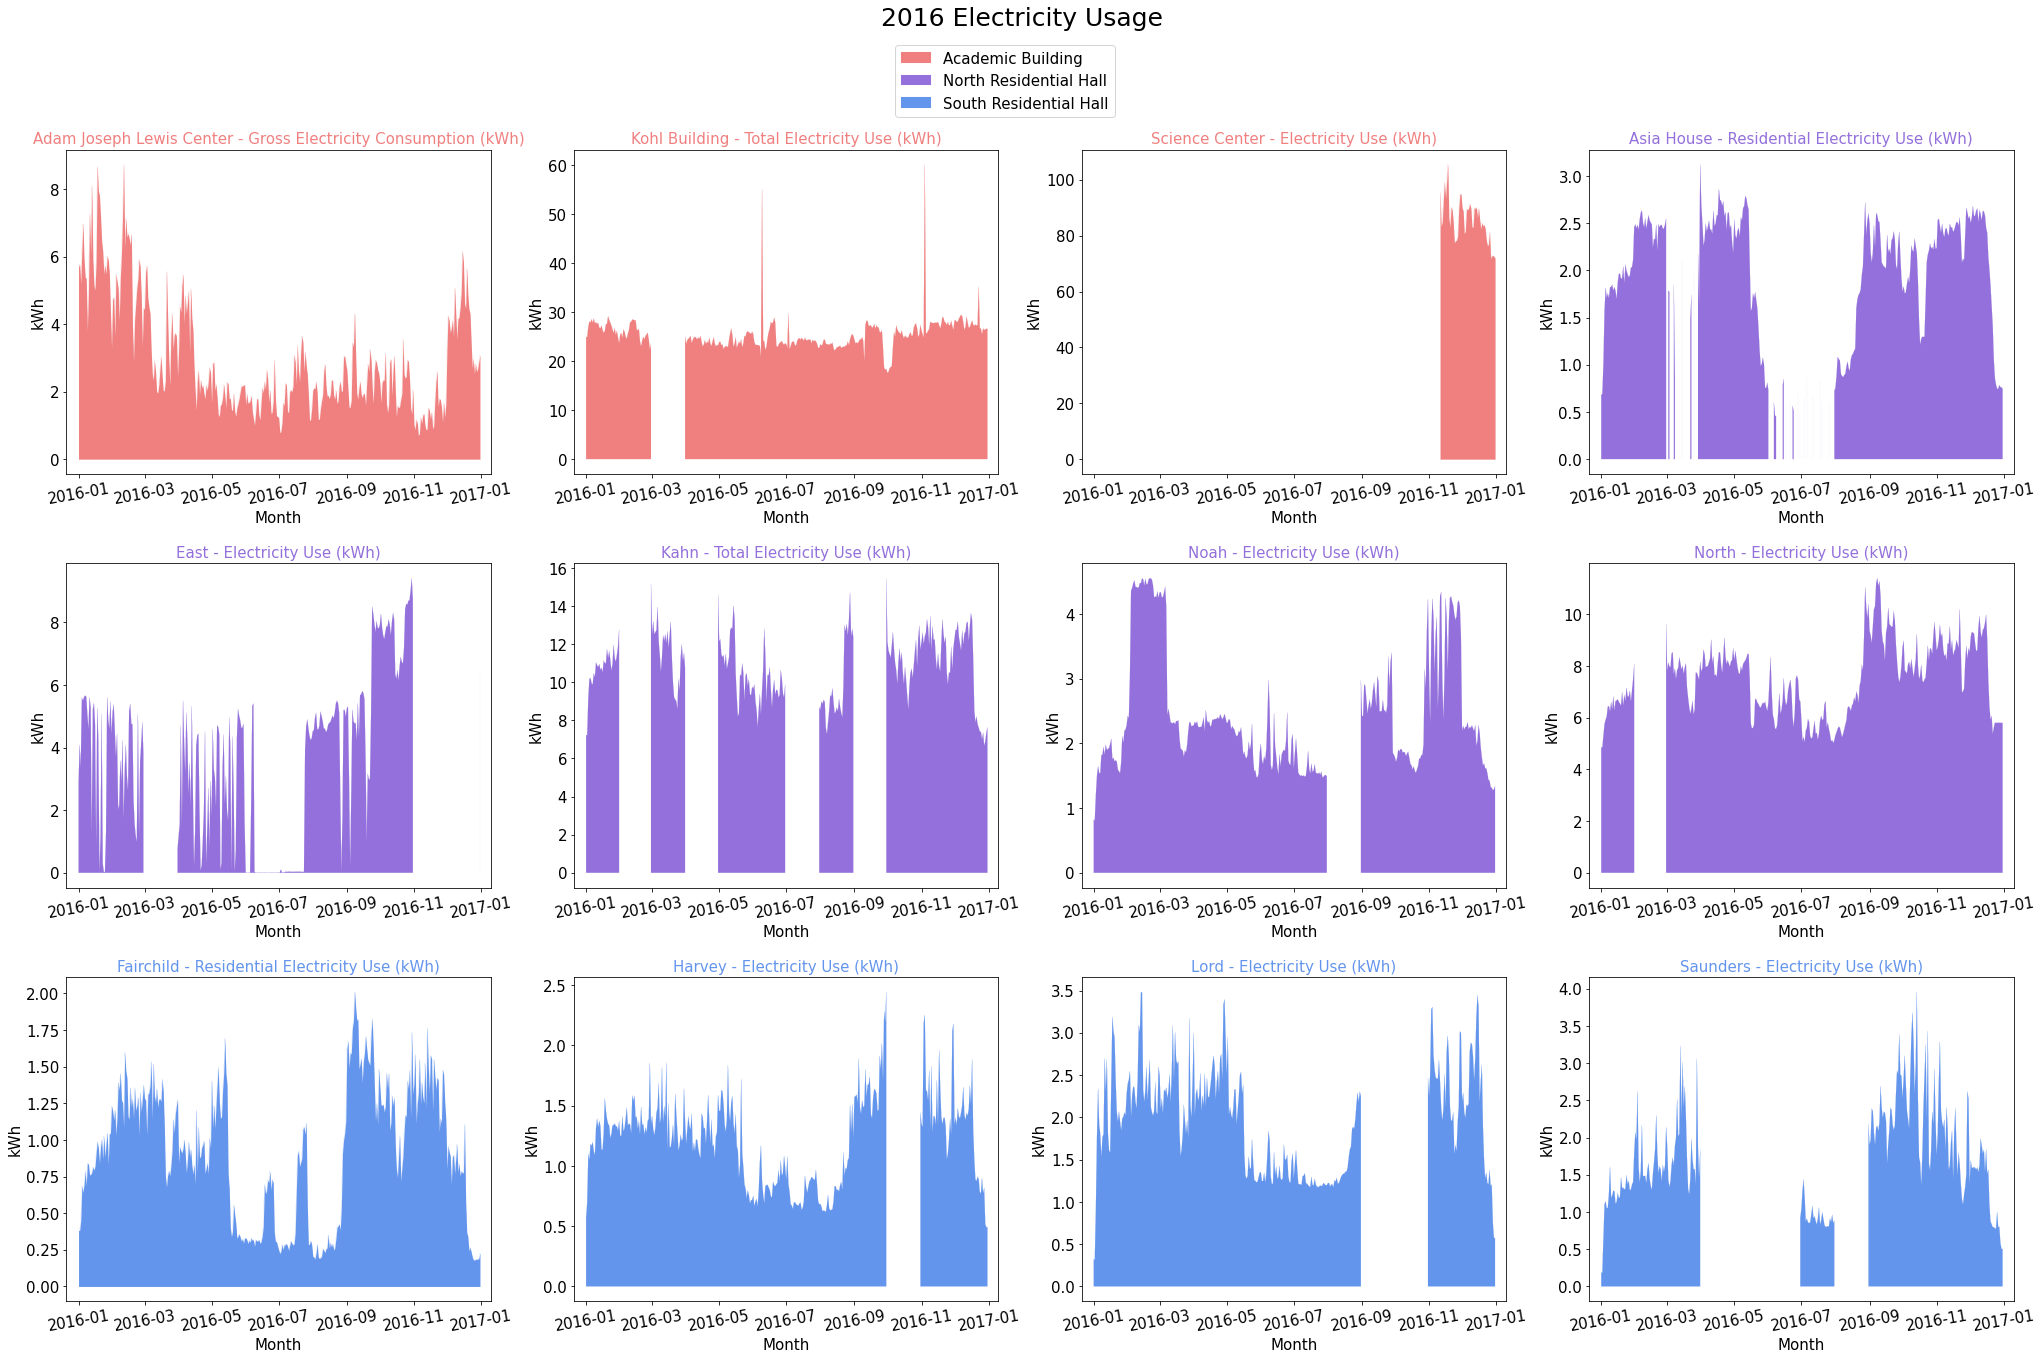

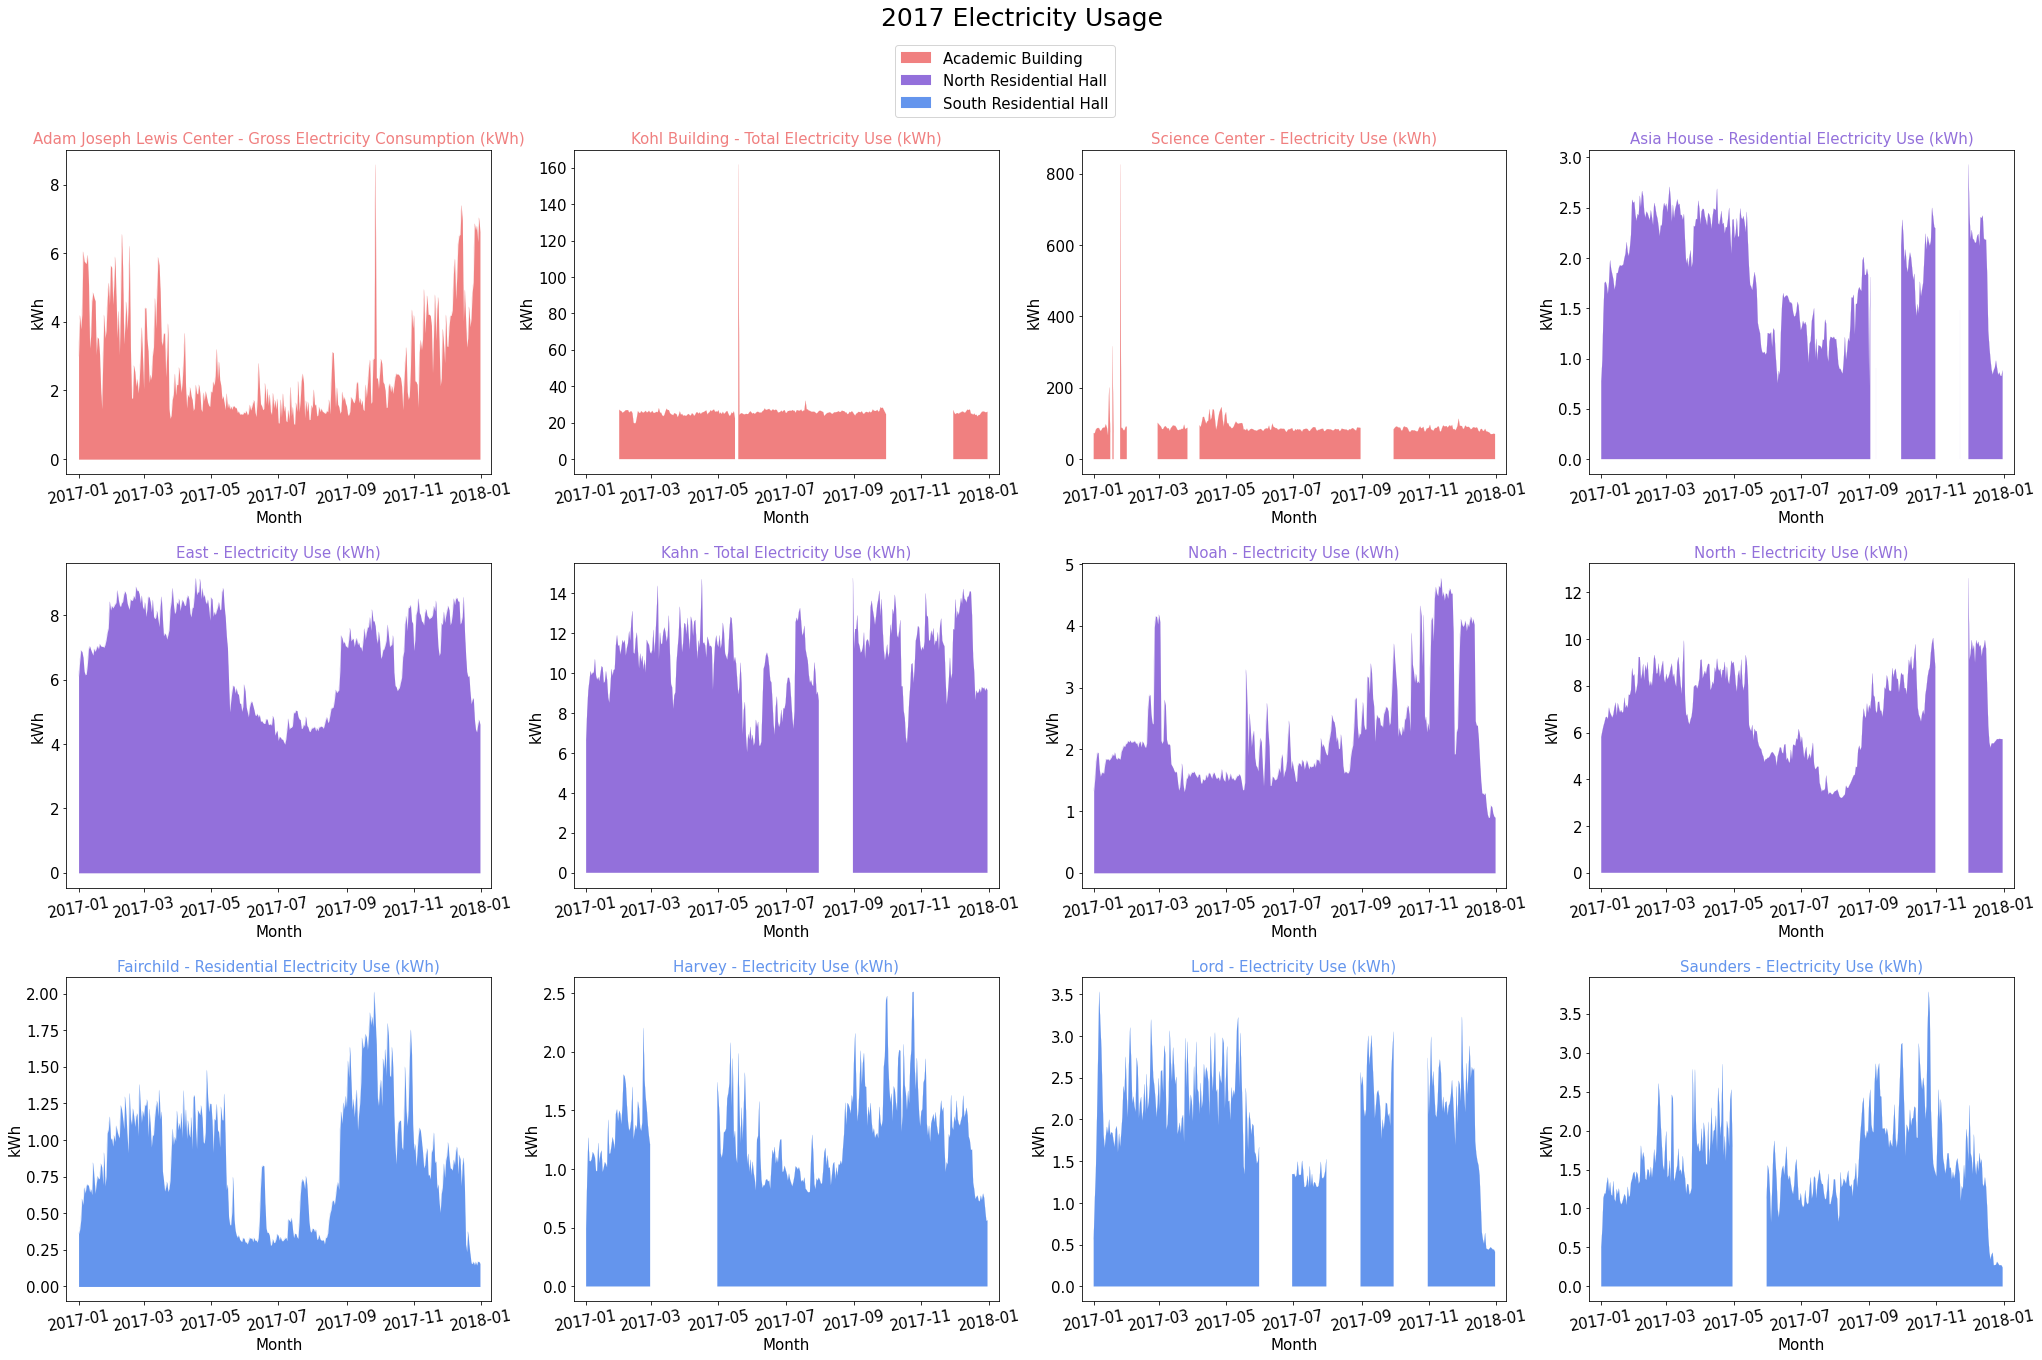

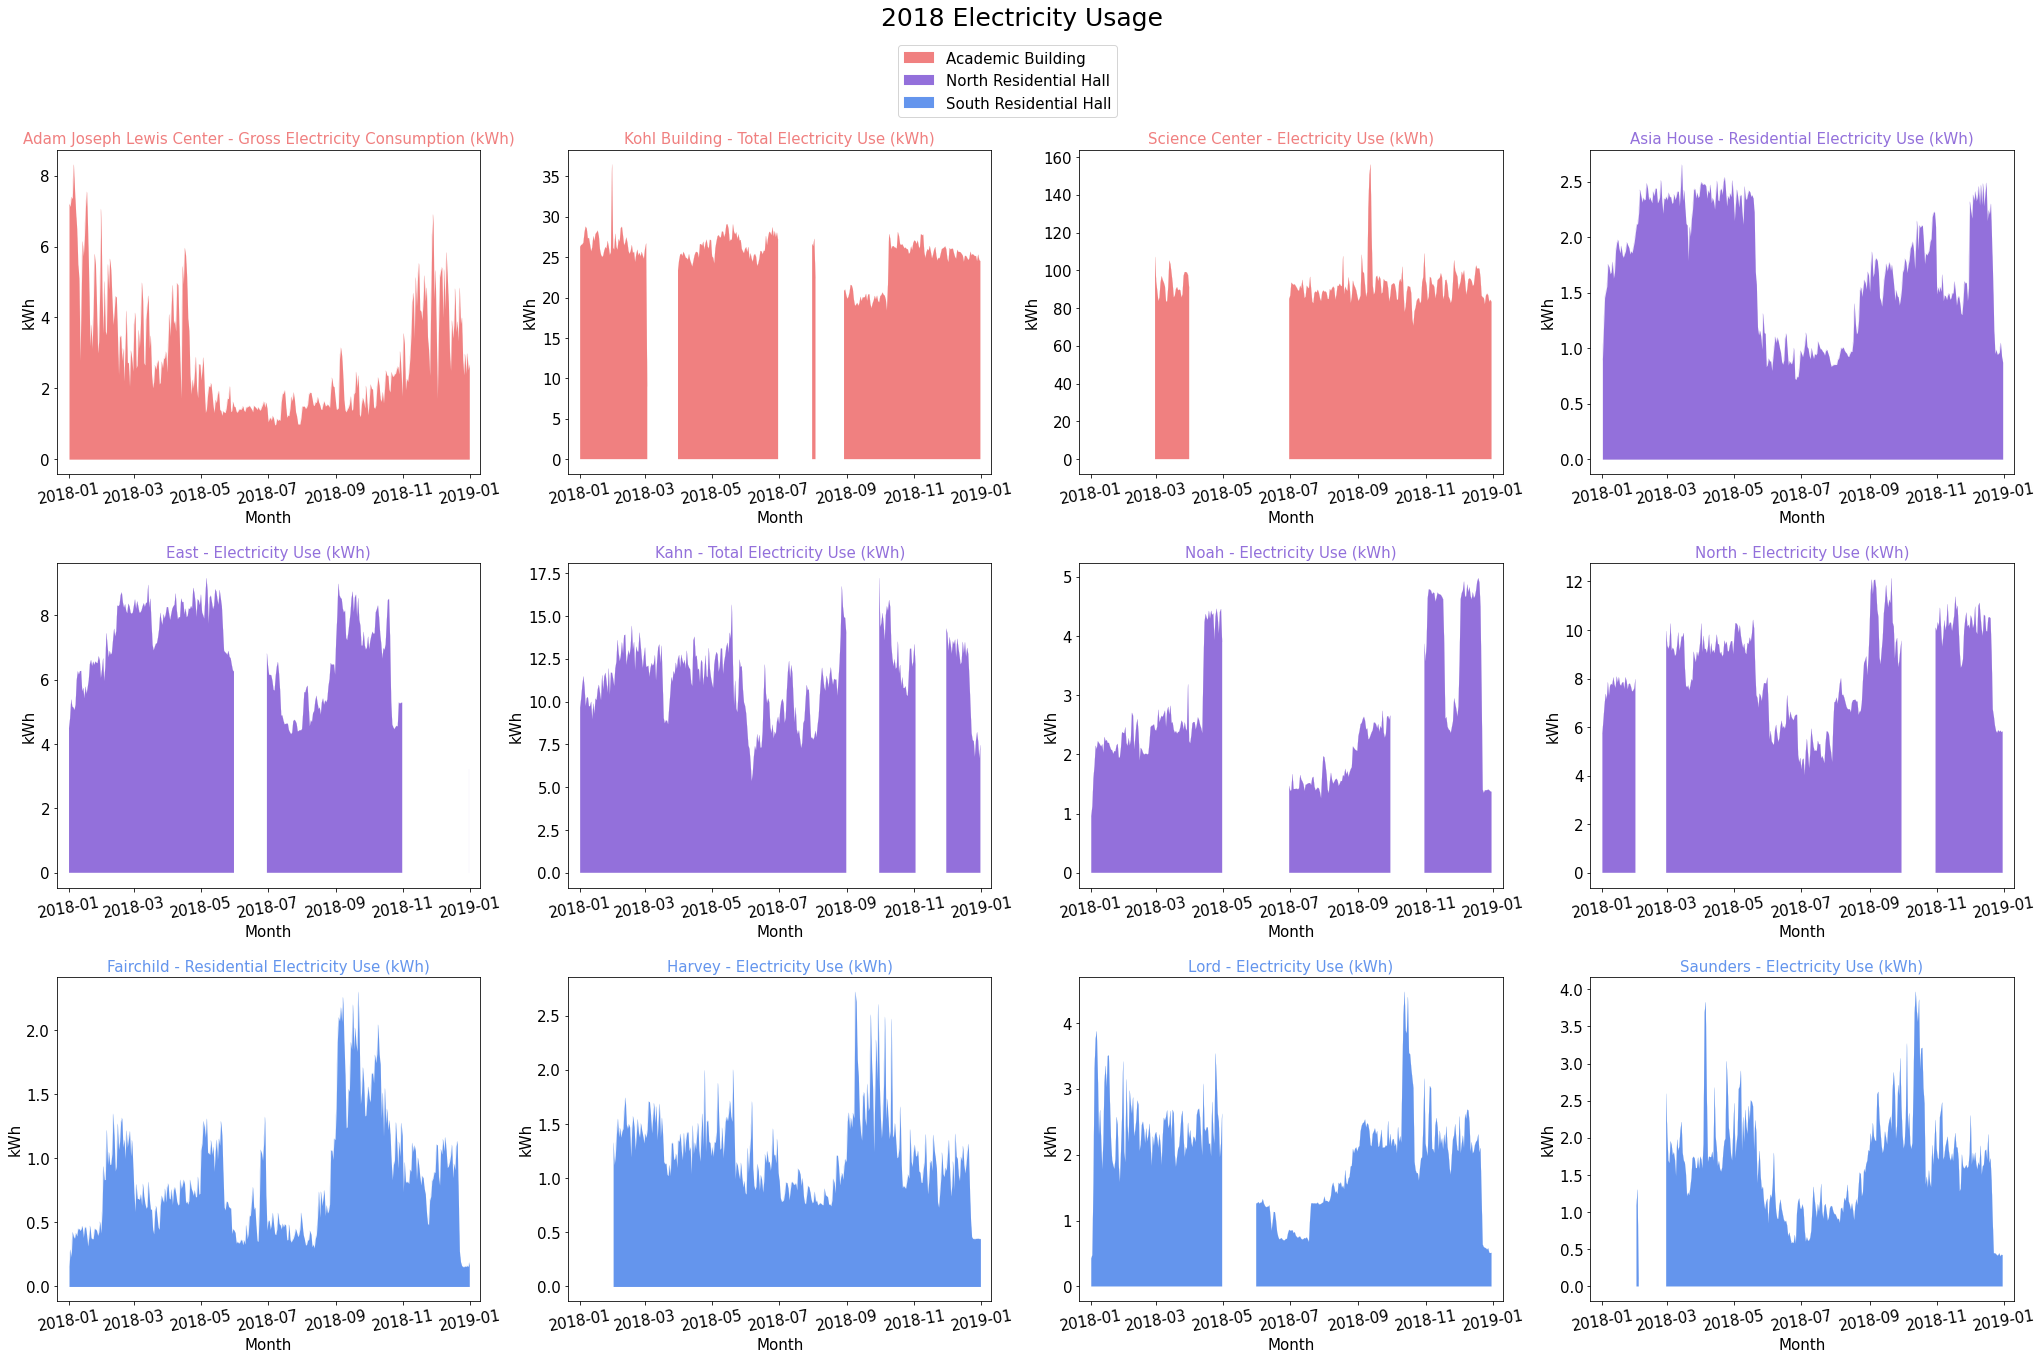

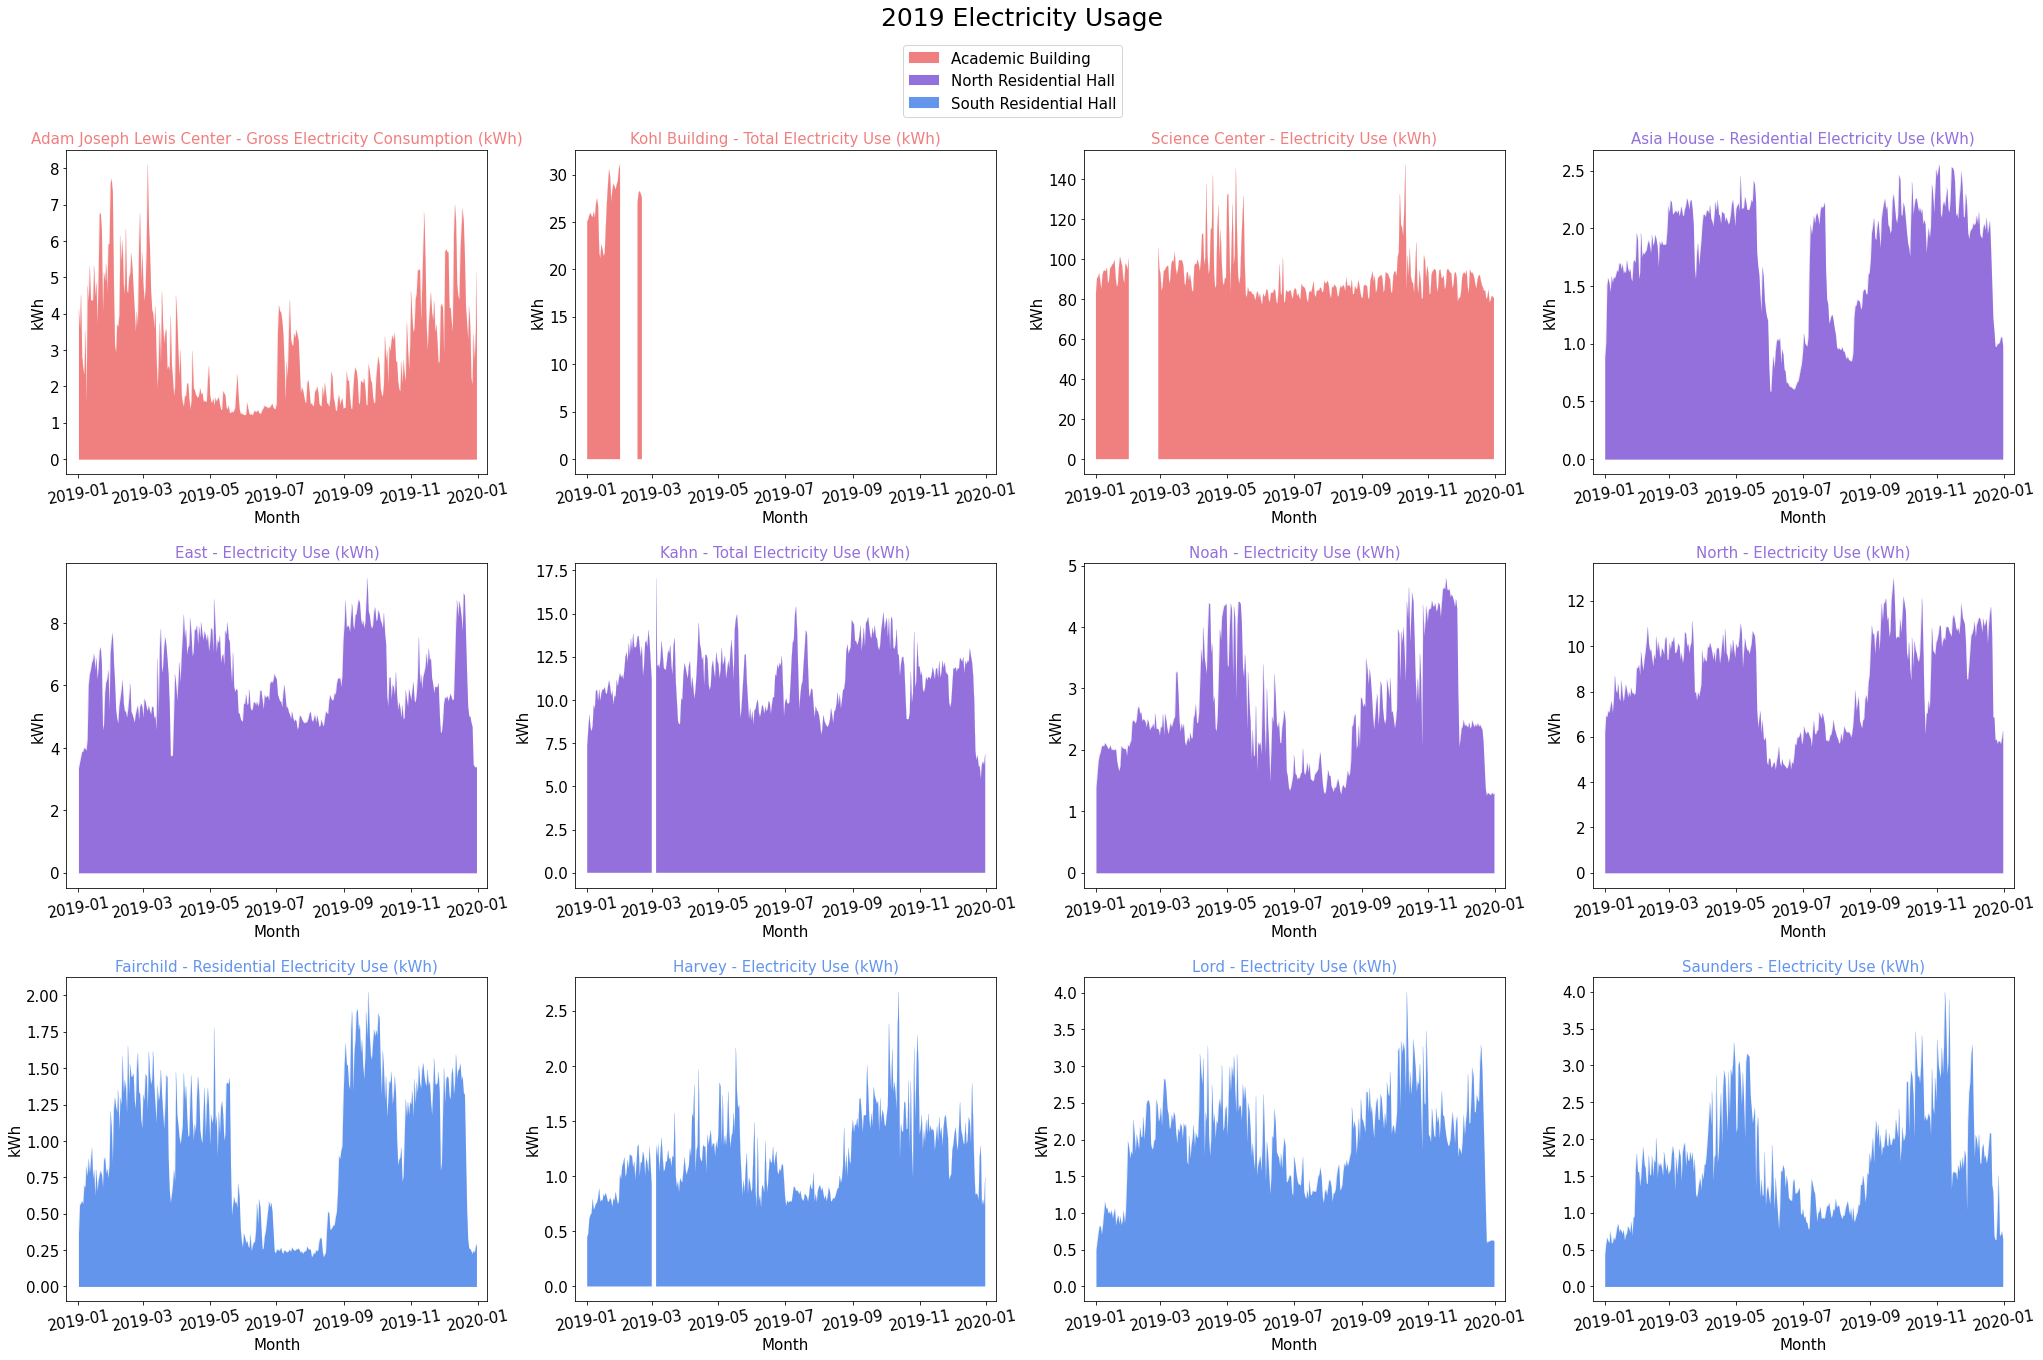

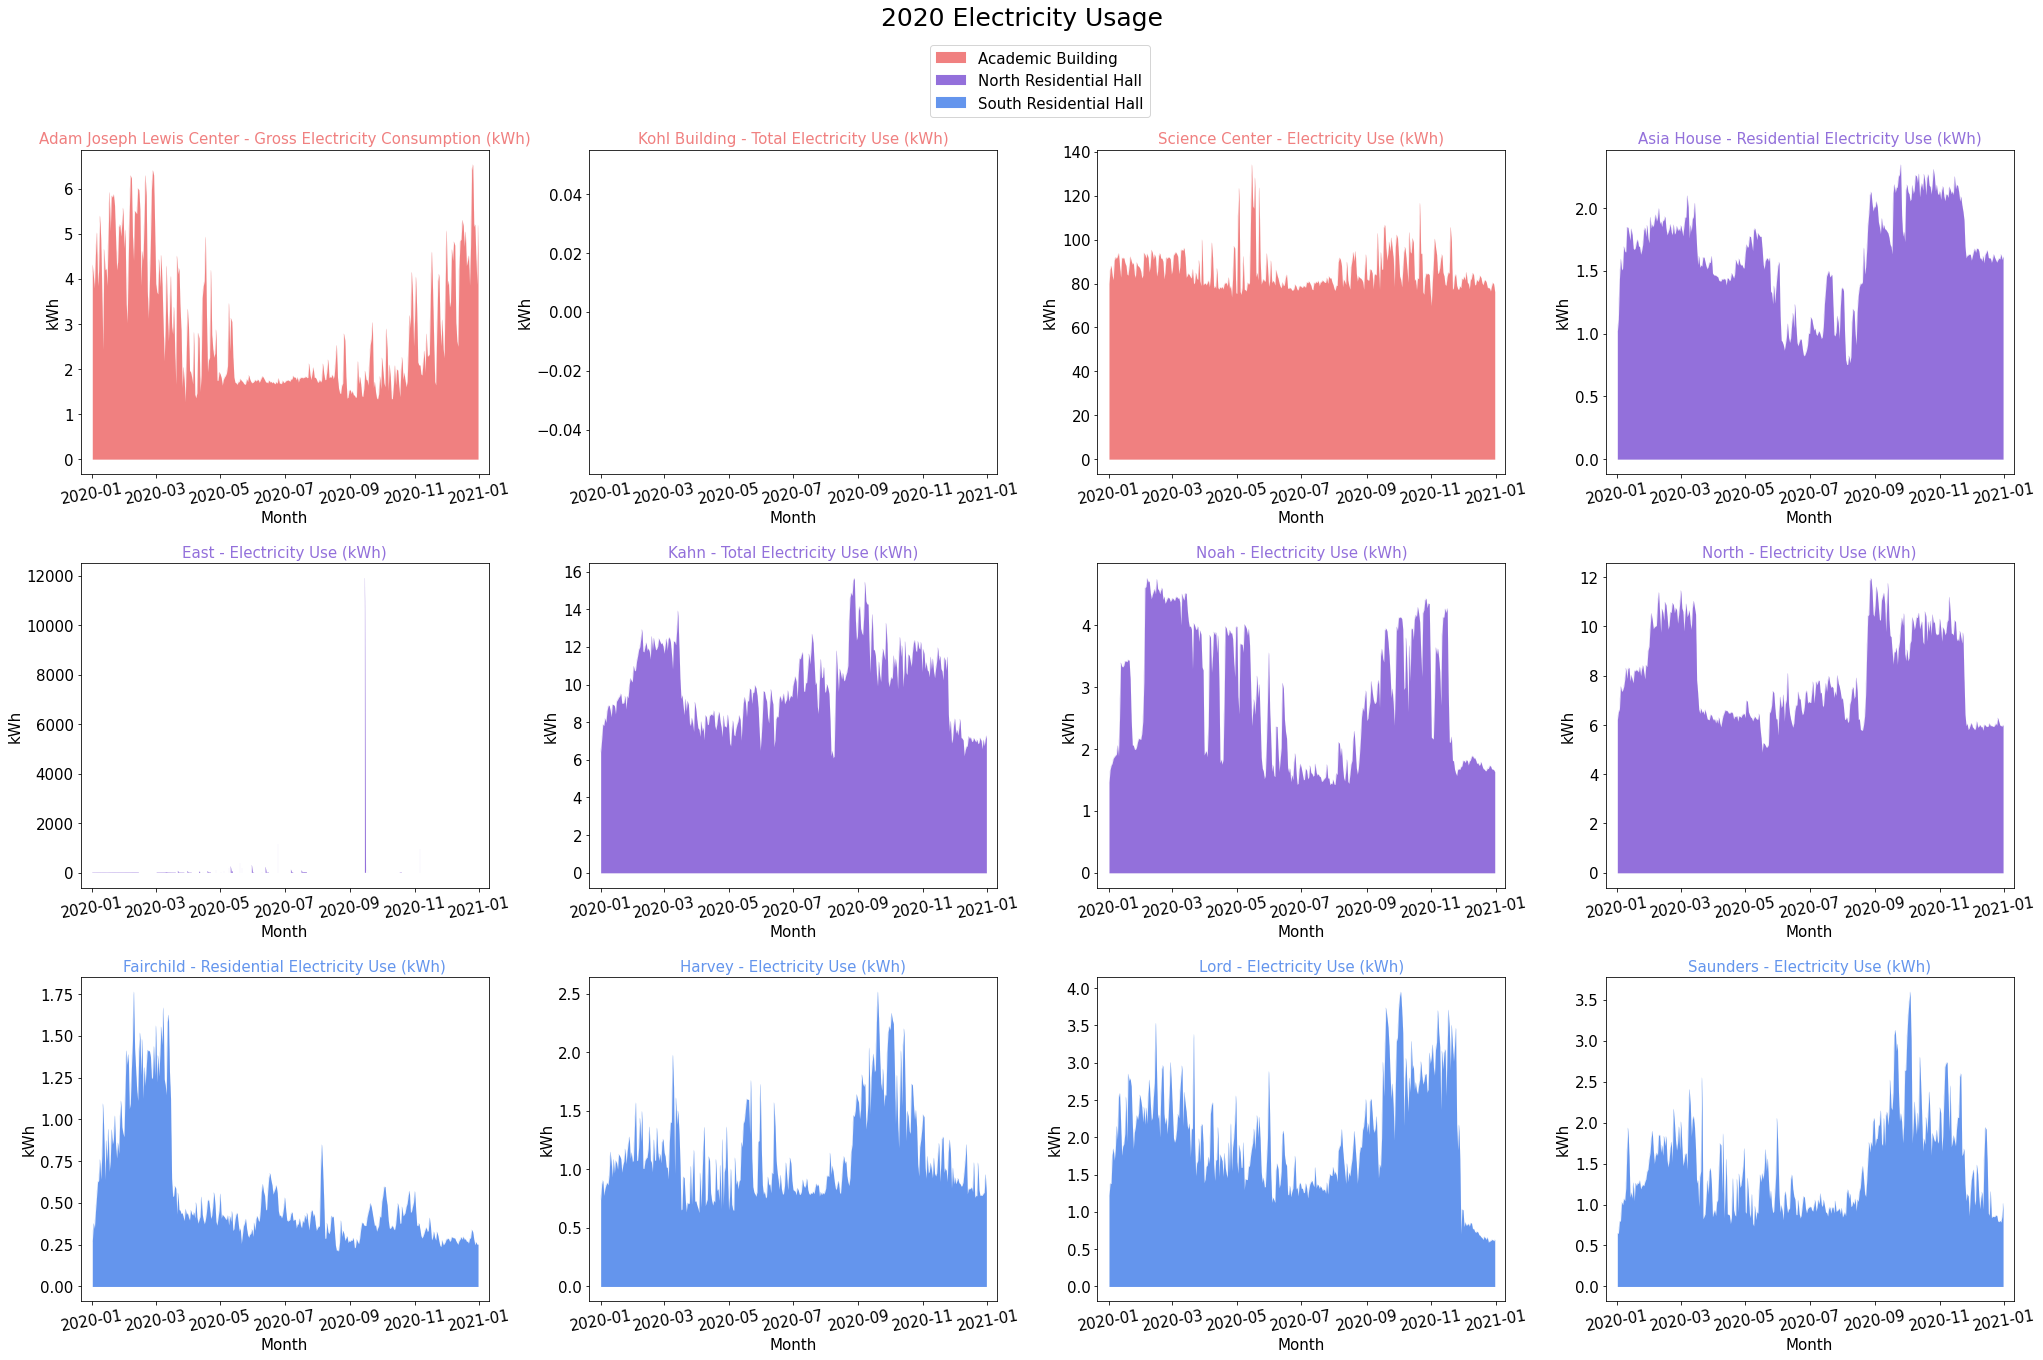

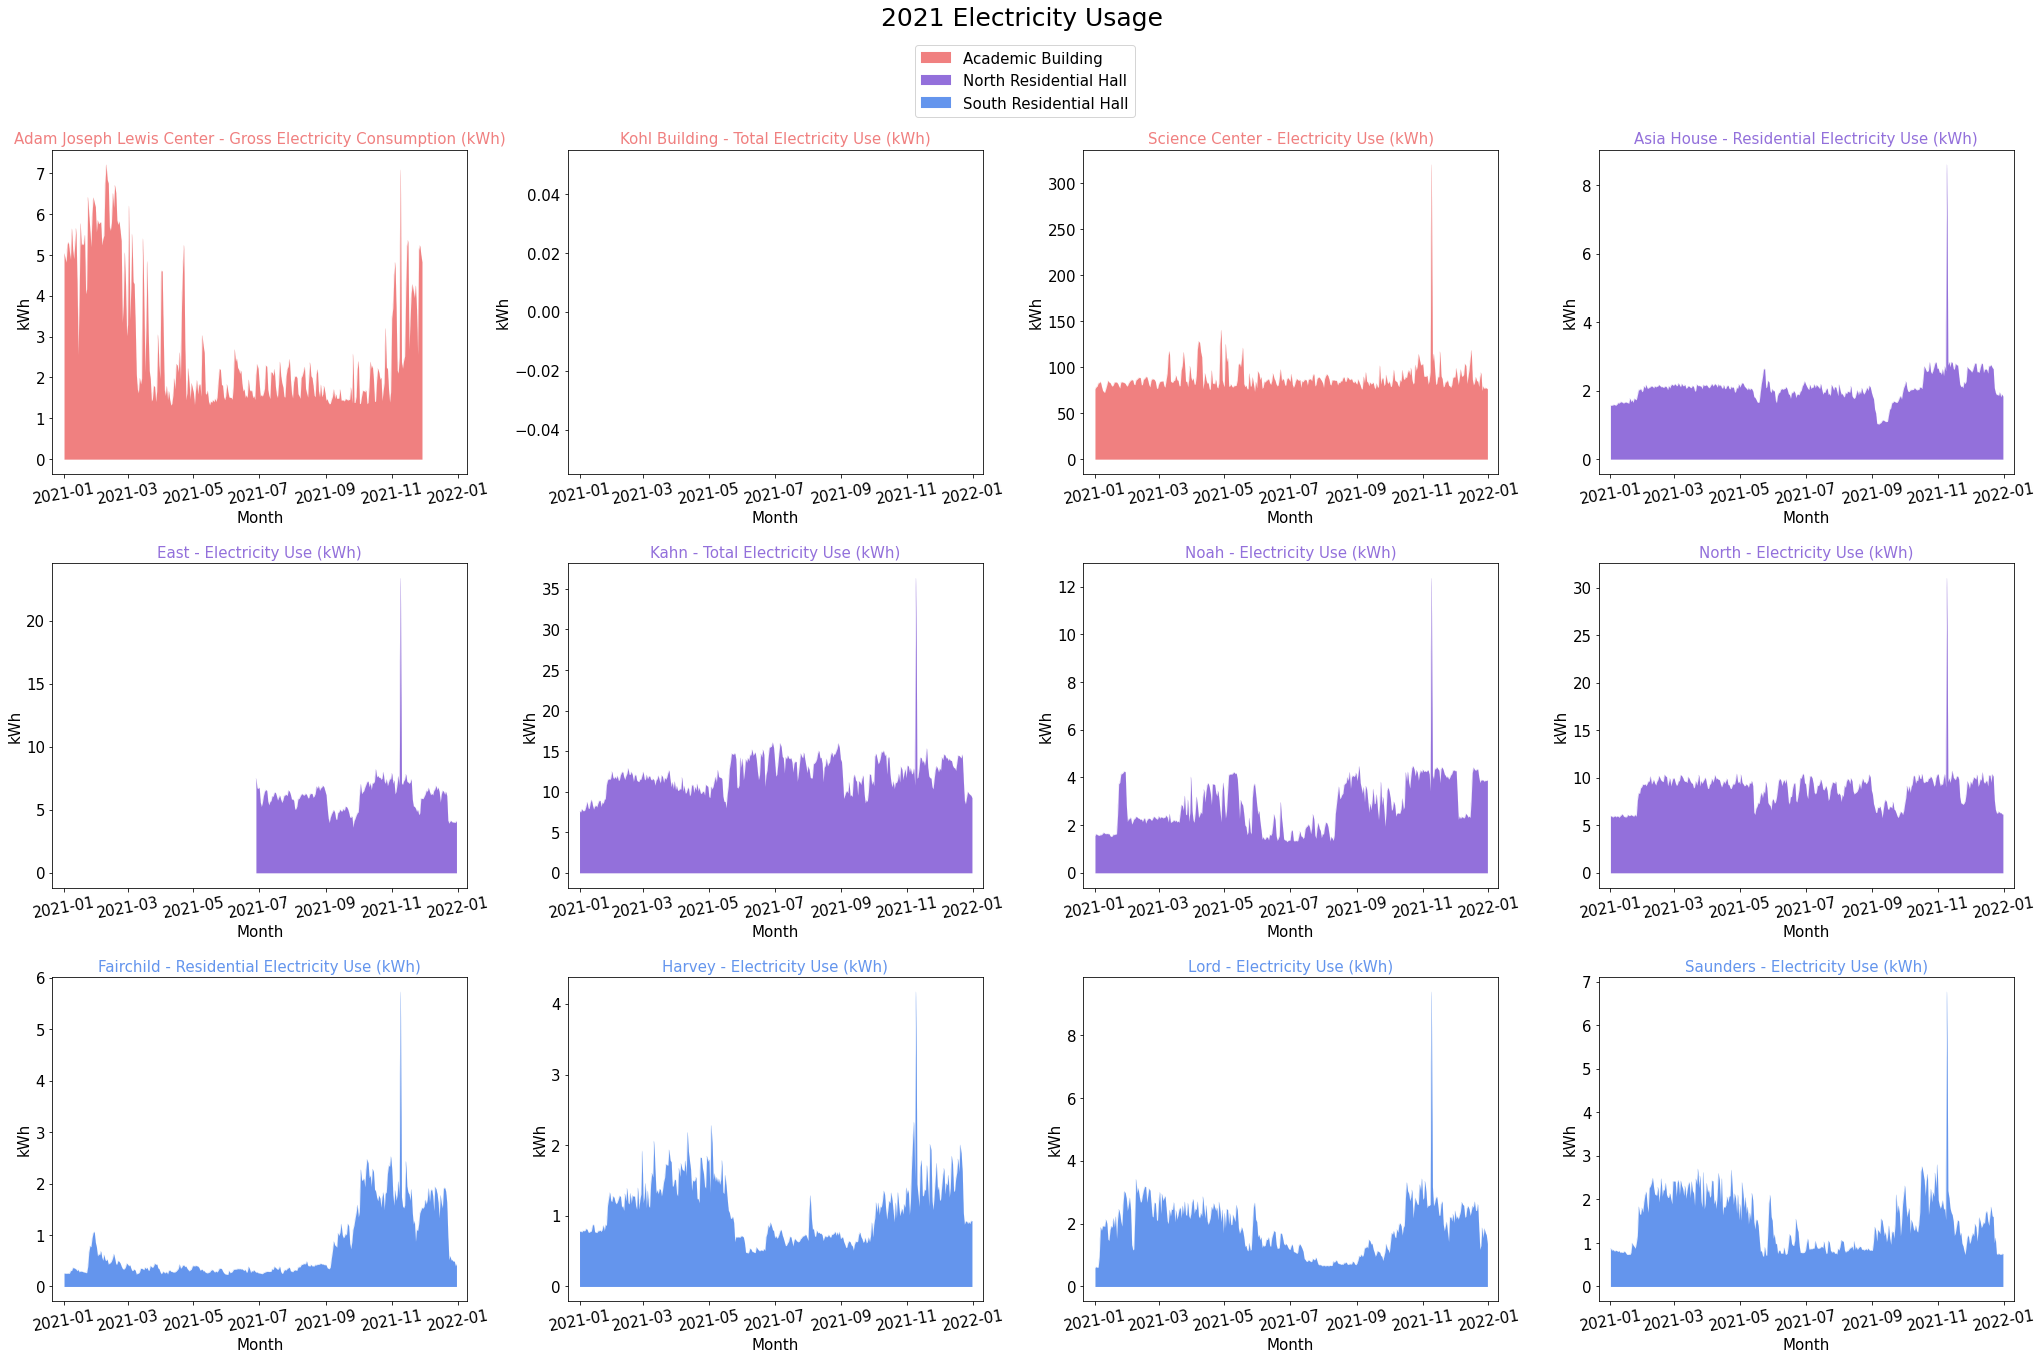

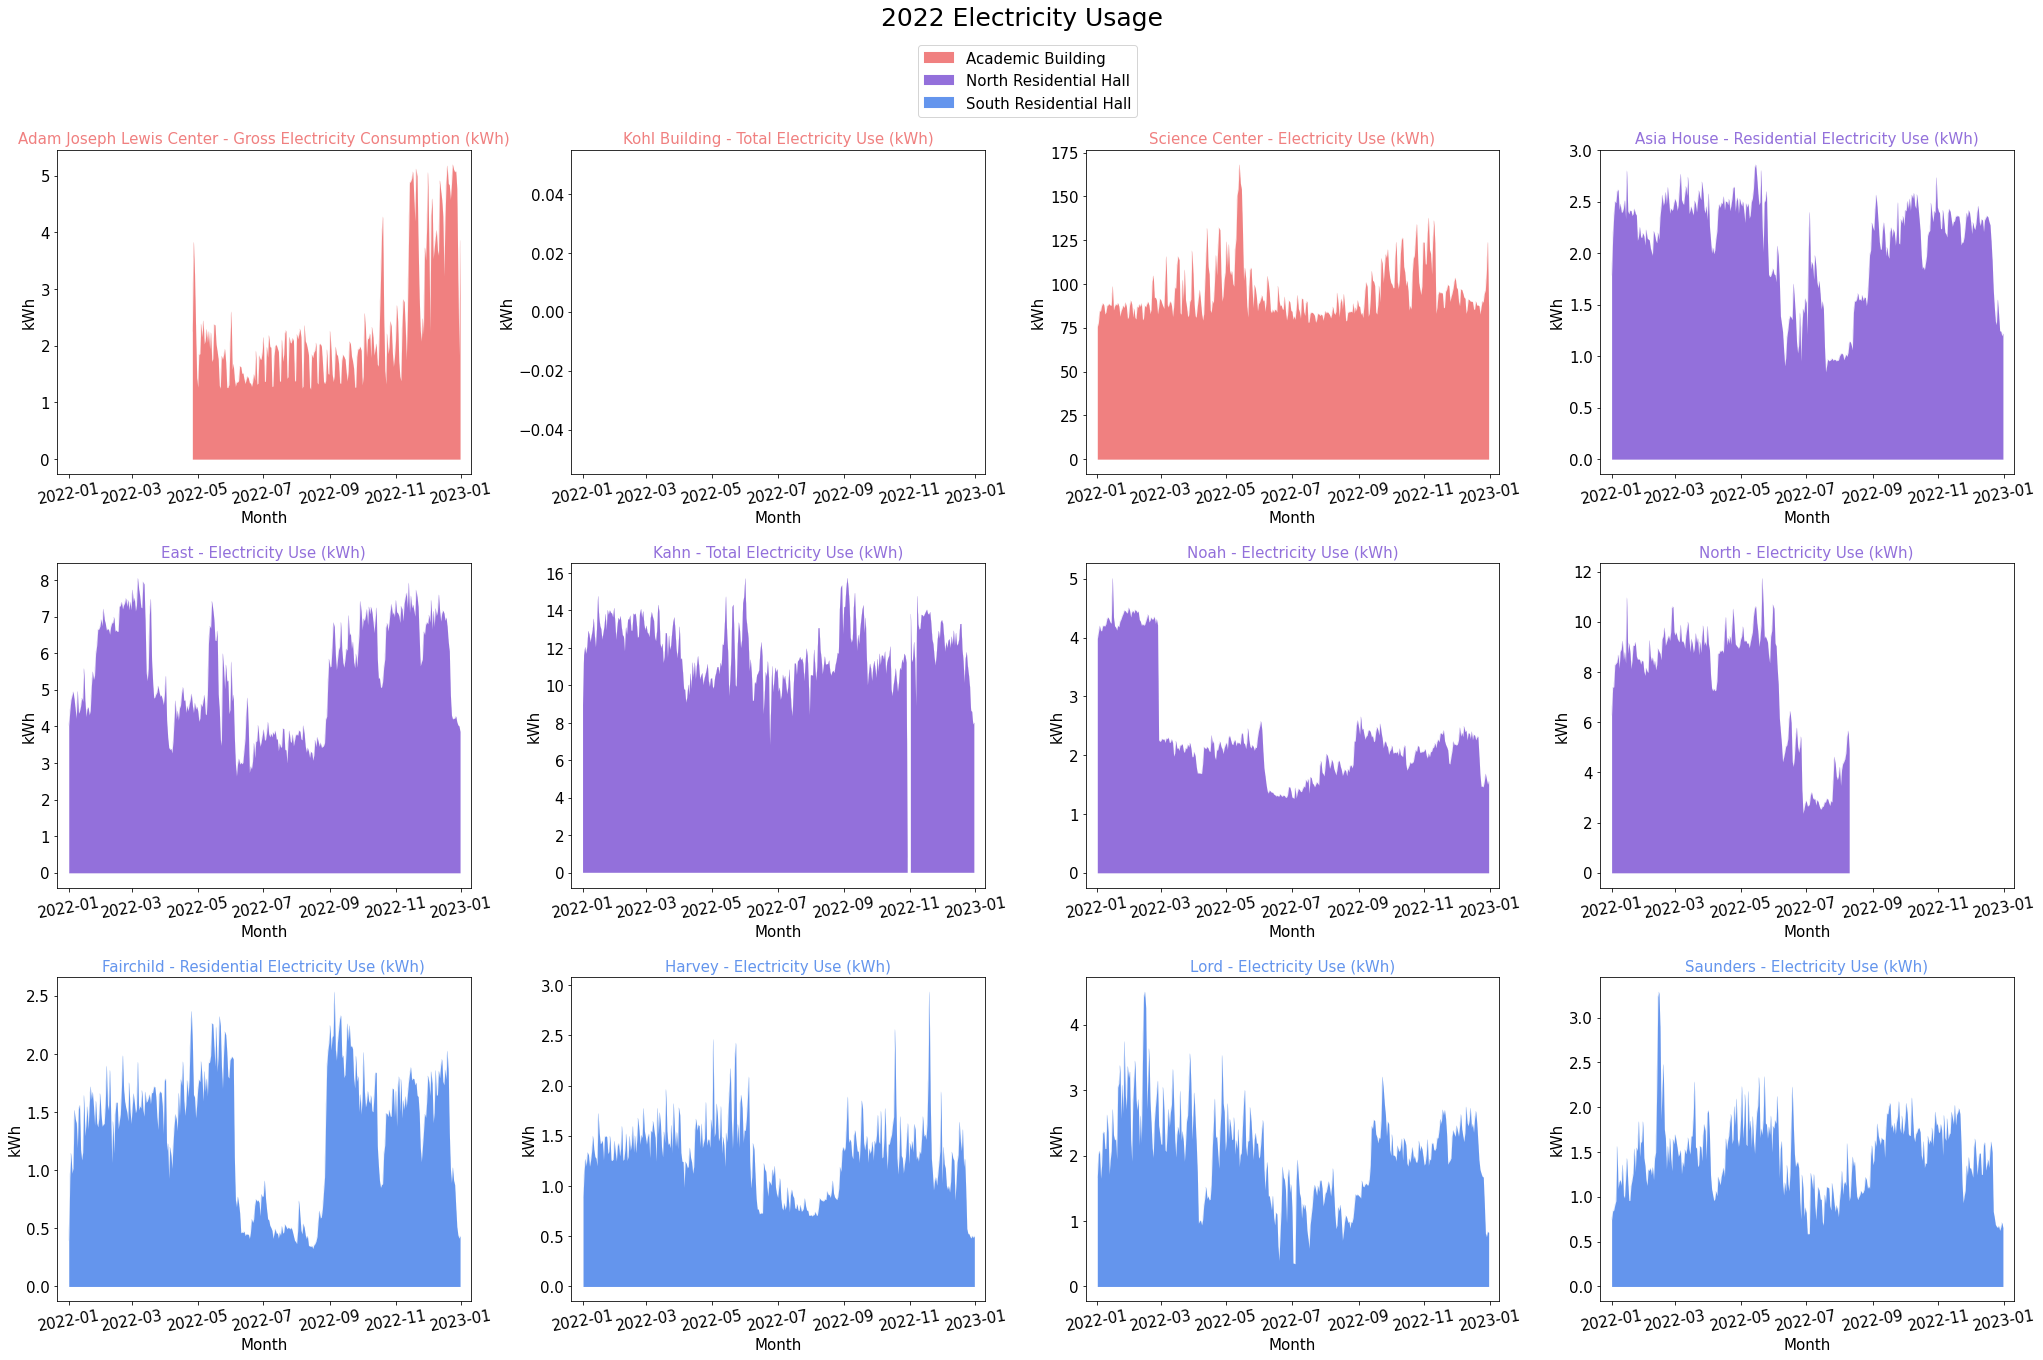

In [501]:
# Plot by year
def plot_by_year2(year, data, fontsize = 15, margin = 10, labelrotation=10):
    year_data = data[data.index.year == year]

    col_num=0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
    fig.suptitle(str(year) +" Electricity Usage", fontsize = fontsize + 10)

    
    
    categories = {}
    
    for row in ax:
        for col in row:
            set_label, set_color = setCategories(col_num)
            col.plot(year_data.index, year_data[year_data.columns[col_num]], color=set_color, linewidth= 0.1) 
            label = col.fill_between(year_data.index, year_data[year_data.columns[col_num]], 0, label = set_label, color = set_color, linewidth= 0.05)
            
            if set_label not in categories:
                categories[set_label] = label
            
            col.set_xlabel("Month", fontsize=fontsize)
            col.set_ylabel("kWh", fontsize=fontsize)
            col.set_xlim([datetime.date(year-1, 12, 31-margin), datetime.date(year+1, 1, margin)]) #CHANGE
            col.set_title(year_data.columns[col_num], fontsize=fontsize, color=setColor(col_num))
            col.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
            col.tick_params(axis='x', labelsize=fontsize, labelrotation = labelrotation)
            col.tick_params(axis='y', labelsize=fontsize)
            col_num+=1
            
    plt.tight_layout(pad=6.5, w_pad=0.5, h_pad=2)
    
    plt.legend(handles=categories.values(), bbox_to_anchor=[-1.1, 3.9], fontsize=fontsize)
    plt.savefig(f"./Graphs/Year2/{year}_Electrical.png")

    # Plot from 2013 to 2023
for year in range(2013, 2023):
    plot_by_year2(year, ordered_data)

In [ ]:
# def plot(data, ax, fontsize=12):
#     ax.bar(data.index, data) 
# #     ax.locator_params(nbins=3)
#     ax.set_xlabel('Date', fontsize=fontsize)
#     ax.set_ylabel('kWh', fontsize=fontsize)
#     ax.set_title('Title', fontsize=fontsize)
    
# fig = plt.figure(figsize=(20, 10))

# ax1 = plt.subplot(221, sharex='col', sharey='row')
# ax2 = plt.subplot(223, sharex='col', sharey='row')
# ax3 = plt.subplot(122, sharex='col', sharey='row')


# plot(year_data[year_data.columns[1]], ax1)
# plot(year_data[year_data.columns[2]], ax2)
# plot(year_data[year_data.columns[3]],ax3)